# Pandas DataFrame for storing tweet feed (total 12 points)

Creating the following data frame for storing tweets:

- **climate_feed_df** DataFrame for storing tweets
- **retweeted_status_df** for storing original tweets

In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import requests
from bs4 import BeautifulSoup as bsp

The pickle files retweeted_status_df.pkl and climate_feed.pkl should be in the same folder as this notebook.
If needed, they can also be downloaded by uncommenting the commands below.

In [2]:
#!wget https://github.com/psnegi/data_science_tools1/raw/master/hws/retweeted_status_df.pkl

In [3]:
#!wget https://github.com/psnegi/data_science_tools1/raw/master/hws/climate_feed.pkl

<font color= "red">Click on these links if the above downloads fail. </font>


https://github.com/psnegi/data_science_tools1/raw/master/hws/climate_feed.pkl

https://github.com/psnegi/data_science_tools1/raw/master/hws/retweeted_status_df.pkl

Keep these pickle files in the same directory as the notebook

In [4]:
retweeted_status_df = pd.read_pickle("./retweeted_status_df.pkl")

In [5]:
retweeted_status_df

contributors coordinates                      created_at  \
0              NaN         NaN                             NaN   
1              NaN        None  Sat Feb 09 20:27:45 +0000 2019   
2              NaN        None  Sat Feb 09 23:56:18 +0000 2019   
3              NaN        None  Sat Feb 09 23:34:27 +0000 2019   
4              NaN        None  Sat Feb 09 19:07:56 +0000 2019   
...            ...         ...                             ...   
9994           NaN        None  Sat Feb 09 20:56:39 +0000 2019   
9995           NaN        None  Thu Feb 07 20:27:55 +0000 2019   
9996           NaN        None  Sat Feb 09 18:33:00 +0000 2019   
9997           NaN        None  Fri Feb 08 22:15:50 +0000 2019   
9998           NaN        None  Sat Feb 09 20:41:00 +0000 2019   

                                               entities extended_entities  \
0                                                   NaN               NaN   
1     {'hashtags': [], 'user_mentions': [], 'urls': ...               NaN   
2     {'hashtags': [], 'user_mentions': [], 'urls': ...               NaN   
3     {'hashtags': [], 'user_mentions': [], 'urls': ...               NaN   
4     {'hashtags': [], 'user_mentions': [], 'urls': ...               NaN   
...                                                 ...               ...   
9994  {'hashtags': [], 'user_mentions': [], 'urls': ...               NaN   
9995  {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
9996  {'hashtags': [], 'user_mentions': [], 'urls': ...               NaN   
9997  {'hashtags': [], 'user_mentions': [], 'urls': ...               NaN   
9998  {'hashtags': [], 'user_mentions': [], 'urls': ...               NaN   

      favorite_count favorited   geo            id               id_str  ...  \
0                NaN       NaN   NaN           NaN                  NaN  ...   
1               99.0     False  None  1.094332e+18  1094332044052549633  ...   
2                6.0     False  None  1.094385e+18  1094384528267902977  ...   
3              190.0     False  None  1.094379e+18  1094379028608438272  ...   
4             2905.0     False  None  1.094312e+18  1094311957669265408  ...   
...              ...       ...   ...           ...                  ...  ...   
9994             1.0     False  None  1.094339e+18  1094339317324017665  ...   
9995          3491.0     False  None  1.093607e+18  1093607309606076416  ...   
9996         12586.0     False  None  1.094303e+18  1094303164805799936  ...   
9997          4249.0     False  None  1.093997e+18  1093996855111966720  ...   
9998           166.0     False  None  1.094335e+18  1094335377194799104  ...   

                                          quoted_status  quoted_status_id  \
0                                                   NaN               NaN   
1                                                   NaN               NaN   
2     {'favorited': False, 'favorite_count': 2642, '...      1.093999e+18   
3     {'favorited': False, 'favorite_count': 220, 'i...      1.093932e+18   
4                                                   NaN               NaN   
...                                                 ...               ...   
9994                                                NaN               NaN   
9995                                                NaN               NaN   
9996                                                NaN               NaN   
9997  {'favorited': False, 'favorite_count': 551, 'i...      1.093893e+18   
9998                                                NaN               NaN   

     quoted_status_id_str  retweet_count retweeted scopes  \
0                     NaN            NaN       NaN    NaN   
1                     NaN           81.0     False    NaN   
2     1093998640392220673            5.0     False    NaN   
3     1093931686998487040           31.0     False    NaN   
4                     NaN          599.0     False    NaN   
...                   ...           

In [6]:
#climate_feed_df.to_pickle("./climate_feed.pkl")
climate_feed_df = pd.read_pickle("./climate_feed.pkl")
climate_feed_df

contributors coordinates                      created_at  \
0            None        None  Sun Feb 10 00:17:31 +0000 2019   
1            None        None  Sun Feb 10 00:17:30 +0000 2019   
2            None        None  Sun Feb 10 00:17:26 +0000 2019   
3            None        None  Sun Feb 10 00:17:24 +0000 2019   
4            None        None  Sun Feb 10 00:17:23 +0000 2019   
...           ...         ...                             ...   
9994         None        None  Sat Feb 09 20:57:54 +0000 2019   
9995         None        None  Sat Feb 09 20:57:54 +0000 2019   
9996         None        None  Sat Feb 09 20:57:53 +0000 2019   
9997         None        None  Sat Feb 09 20:57:51 +0000 2019   
9998         None        None  Sat Feb 09 20:57:51 +0000 2019   

                                               entities extended_entities  \
0     {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
1     {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
2     {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
3     {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
4     {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
...                                                 ...               ...   
9994  {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
9995  {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
9996  {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
9997  {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
9998  {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   

     favorite_count favorited   geo                   id               id_str  \
0                 0     False  None  1094389867499405313  1094389867499405313   
1                 0     False  None  1094389862193455105  1094389862193455105   
2                 0     False  None  1094389844078485506  1094389844078485506   
3                 0     False  None  1094389837522599936  1094389837522599936   
4                 0     False  None  1094389831419994112  1094389831419994112   
...             ...       ...   ...                  ...                  ...   
9994              0     False  None  1094339630500012033  1094339630500012033   
9995              0     False  None  1094339629107400704  1094339629107400704   
9996              0     False  None  1094339627316641794  1094339627316641794   
9997              0     False  None  1094339619569557504  1094339619569557504   
9998              0     False  None  1094339617581481984  1094339617581481984   

      ... quoted_status     quoted_status_id quoted_status_id_str  \
0     ...           NaN                  NaN                  NaN   
1     ...           NaN                  NaN                  NaN   
2     ...           NaN  1093998640392220673  1093998640392220673   
3     ...           NaN  1093931686998487040  1093931686998487040   
4     ...           NaN                  NaN                  NaN   
...   ...           ...                  ...                  ...   
9994  ...           NaN                  NaN                  NaN   
9995  ...           NaN                  NaN                  NaN   
9996  ...           NaN                  NaN                  NaN   
9997  ...           NaN  1093893115633647616  1093893115633647616   
9998  ...           NaN                  NaN                  NaN   

     retweet_count retweeted retweeted_status  \
0                0     False              NaN   
1               81     False     1.094332e+18   
2                5     False     1.094385e+18   
3               31     False     1.094379e+18   
4              599     False     1.094312e+18   
...            ...       ...              ...   
9994             1     False     1.094339e+18   
9995           482     False     1.093607e+18   
9996          2801     False     1.094303e+18   
9997   

Here are dtypes for climate_feed_df. We'll work with only
- entities: to extract hashtags
- retweeted_status: in case we need to extract original full tweet
- truncated
- text: tweet text
- created_at
- user_id

Some of them have wrong datatypes.

In [7]:
climate_feed_df.dtypes

contributors                  object
coordinates                   object
created_at                    object
entities                      object
extended_entities             object
favorite_count                object
favorited                     object
geo                           object
id                            object
id_str                        object
in_reply_to_screen_name       object
in_reply_to_status_id         object
in_reply_to_status_id_str     object
in_reply_to_user_id           object
in_reply_to_user_id_str       object
is_quote_status               object
lang                          object
metadata                      object
place                         object
possibly_sensitive            object
quoted_status                 object
quoted_status_id              object
quoted_status_id_str          object
retweet_count                 object
retweeted                     object
retweeted_status             float64
source                        object
t

# Q1 (points .5) Replace None with nan in climate_feed_df. Also display some random rows.


In [8]:
# write code here
climate_feed_df.replace("None", np.NaN, inplace=True)

Working with only selected attributes.

In [9]:
climate_feed_df = climate_feed_df[['created_at', 'entities','retweeted_status', 'truncated', 'user_id', 'text' ]].copy()

In [10]:
climate_feed_df.sample(10)    # displays random rows

created_at  \
2141  Sat Feb 09 23:36:27 +0000 2019   
9001  Sat Feb 09 21:16:18 +0000 2019   
4222  Sat Feb 09 22:54:49 +0000 2019   
2481  Sat Feb 09 23:30:23 +0000 2019   
6348  Sat Feb 09 22:09:12 +0000 2019   
5603  Sat Feb 09 22:24:41 +0000 2019   
2206  Sat Feb 09 23:35:36 +0000 2019   
7206  Sat Feb 09 21:51:51 +0000 2019   
4447  Sat Feb 09 22:49:13 +0000 2019   
6216  Sat Feb 09 22:11:58 +0000 2019   

                                               entities  retweeted_status  \
2141  {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094008e+18   
9001  {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
4222  {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094266e+18   
2481  {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094376e+18   
6348  {'hashtags': [], 'user_mentions': [], 'urls': ...               NaN   
5603  {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
2206  {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094359e+18   
7206  {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094212e+18   
4447  {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094355e+18   
6216  {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094192e+18   

     truncated              user_id  \
2141     False  1027945060367708160   
9001      True           3510152719   
4222     False            724241316   
2481     False             20336330   
6348      True             14227307   
5603      True   989619399832293376   
2206     False            288010117   
7206     False   978381950548246528   
4447     False           1894796731   
6216     False           1049963192   

                                                   text  
2141  RT @COClimateFuture: Coloradans have experienc...  
9001  @GeorgeTakei Also, as atmospheric composition ...  
4222  RT @grist: A bunch of Republicans and Democrat...  
2481  RT @ida_skibenes: Science/history based educat...  
6348  This is your crew, by the way. These are your ...  
5603  @m2jr Both may be issues, but intensity &amp; ...  
2206  RT @_Oliver_Yates: If only Abbott could fight ...  
7206  RT @marklevinshow: The insane Democrat Left.  ...  
4447  RT @Carbongate: HUMAN INDUCED CLIMATE CHANGE I...  
6216  RT @PTIofficial: Prime Minister Imran Khan has...

# Q2 (points .5 =.25+.25) convert
- created_at to date time type
- truncated to bool type.


In [11]:
# write code here
climate_feed_df['created_at'] = pd.to_datetime(climate_feed_df['created_at'])
climate_feed_df['truncated'] = climate_feed_df['truncated'].astype('bool')

Checking datatype again

In [12]:
climate_feed_df.dtypes

created_at          datetime64[ns, UTC]
entities                         object
retweeted_status                float64
truncated                          bool
user_id                           int64
text                             object
dtype: object

# Q3(points .5) In climate_feed_df, calculate the number of NAN values in various columns

In [13]:
# write code here
climate_feed_df.isna().sum()    # .isnull() is an alias for .isna()

created_at             0
entities               0
retweeted_status    2690
truncated              0
user_id                0
text                   0
dtype: int64

We'll use **ast** module to parse string to python dictionary

# Q4(points 1=.5+.5) Using *ast* module  convert entities to python dictionary. This dictionary should contain hashtags and user_mentions
 - Create a column named hashtags. Values in this columns should be comma separated values of **text** attribute in **hashtags**  value.
 - Create a column named user_mentions. Values in this columns should be command separated values of **name** attribute in **user_mentions** values.

### Abstract Syntax Trees (ast) is a Python standard library module
https://docs.python.org/3/library/ast.html >> *ast.literal_eval*

In [14]:
import ast    # part of python standard library


def ast_grab_hashtags(row):   
    
    ent_list = ast.literal_eval(row['entities'])
    print(f"{row.name}\t{ent_list['hashtags']}")
    
    temp_list = []
    
    if not ent_list['hashtags']:    # check to see if the list is empty
        return np.nan
        
    for i in range(len(ent_list['hashtags'])):
        if ent_list['hashtags']:
            temp_list.append(ent_list['hashtags'][i]['text'])

    if temp_list:
        print('\t-->', temp_list)
        return ", ".join(temp_list)   # this fills the column CSV-style

In [15]:
climate_feed_df['hashtags'] = climate_feed_df.apply(ast_grab_hashtags, axis=1)

0	[]
1	[]
2	[]
3	[]
4	[]
5	[]
6	[]
7	[]
8	[]
9	[]
10	[]
11	[]
12	[]
13	[]
14	[]
15	[]
16	[{'indices': [109, 115], 'text': 'ncpol'}]
	--> ['ncpol']
17	[]
18	[]
19	[]
20	[]
21	[]
22	[{'indices': [89, 95], 'text': 'space'}, {'indices': [96, 108], 'text': 'environment'}]
	--> ['space', 'environment']
23	[]
24	[]
25	[]
26	[]
27	[]
28	[]
29	[]
30	[]
31	[]
32	[]
33	[]
34	[]
35	[]
36	[]
37	[]
38	[]
39	[]
40	[]
41	[]
42	[]
43	[]
44	[]
45	[]
46	[]
47	[]
48	[]
49	[]
50	[]
51	[]
52	[]
53	[]
54	[]
55	[]
56	[]
57	[]
58	[]
59	[]
60	[]
61	[]
62	[]
63	[{'indices': [63, 77], 'text': 'ClimateChange'}]
	--> ['ClimateChange']
64	[]
65	[]
66	[]
67	[]
68	[]
69	[]
70	[]
71	[{'indices': [39, 53], 'text': 'TheResistance'}]
	--> ['TheResistance']
72	[]
73	[]
74	[]
75	[]
76	[]
77	[{'indices': [101, 110], 'text': 'insiders'}]
	--> ['insiders']
78	[{'indices': [0, 13], 'text': 'HarrisonFord'}, {'indices': [52, 66], 'text': 'climatechange'}]
	--> ['HarrisonFord', 'climatechange']
79	[]
80	[]
81	[]
82	[]
83	[]
84	[]


762	[]
763	[]
764	[]
765	[]
766	[]
767	[]
768	[]
769	[]
770	[]
771	[]
772	[]
773	[]
774	[]
775	[]
776	[]
777	[]
778	[{'indices': [73, 77], 'text': 'NPR'}]
	--> ['NPR']
779	[]
780	[]
781	[{'indices': [135, 139], 'text': 'KAG'}]
	--> ['KAG']
782	[]
783	[]
784	[]
785	[]
786	[]
787	[]
788	[{'indices': [101, 110], 'text': 'insiders'}]
	--> ['insiders']
789	[]
790	[{'indices': [86, 95], 'text': 'emerging'}, {'indices': [96, 109], 'text': 'emergingtech'}, {'indices': [110, 129], 'text': 'emergingtechnology'}]
	--> ['emerging', 'emergingtech', 'emergingtechnology']
791	[]
792	[]
793	[]
794	[]
795	[]
796	[]
797	[]
798	[]
799	[{'indices': [117, 126], 'text': 'AUSUMMIT'}]
	--> ['AUSUMMIT']
800	[]
801	[]
802	[]
803	[]
804	[]
805	[]
806	[]
807	[]
808	[]
809	[]
810	[]
811	[]
812	[]
813	[]
814	[]
815	[]
816	[]
817	[]
818	[]
819	[]
820	[]
821	[]
822	[]
823	[]
824	[]
825	[]
826	[]
827	[]
828	[]
829	[]
830	[]
831	[]
832	[]
833	[]
834	[]
835	[]
836	[]
837	[{'indices': [135, 139], 'text': 'KAG'}]
	--> ['K

1423	[]
1424	[]
1425	[]
1426	[]
1427	[]
1428	[]
1429	[]
1430	[]
1431	[]
1432	[]
1433	[]
1434	[]
1435	[]
1436	[]
1437	[]
1438	[]
1439	[]
1440	[{'indices': [122, 127], 'text': 'ma4t'}]
	--> ['ma4t']
1441	[]
1442	[]
1443	[]
1444	[]
1445	[]
1446	[]
1447	[]
1448	[]
1449	[]
1450	[]
1451	[]
1452	[]
1453	[]
1454	[]
1455	[]
1456	[]
1457	[]
1458	[]
1459	[{'indices': [30, 42], 'text': 'antivaxxers'}]
	--> ['antivaxxers']
1460	[]
1461	[]
1462	[]
1463	[]
1464	[]
1465	[]
1466	[]
1467	[]
1468	[]
1469	[]
1470	[]
1471	[]
1472	[]
1473	[]
1474	[]
1475	[]
1476	[]
1477	[]
1478	[]
1479	[]
1480	[]
1481	[]
1482	[]
1483	[]
1484	[]
1485	[]
1486	[]
1487	[]
1488	[]
1489	[]
1490	[]
1491	[]
1492	[]
1493	[]
1494	[]
1495	[]
1496	[]
1497	[]
1498	[]
1499	[{'indices': [66, 77], 'text': 'frackedgas'}, {'indices': [81, 90], 'text': 'methanol'}]
	--> ['frackedgas', 'methanol']
1500	[]
1501	[]
1502	[]
1503	[]
1504	[]
1505	[]
1506	[]
1507	[{'indices': [70, 90], 'text': 'ClimateChangeIsReal'}, {'indices': [91, 104], 'text': '

2303	[]
2304	[]
2305	[]
2306	[]
2307	[]
2308	[]
2309	[]
2310	[]
2311	[]
2312	[{'indices': [74, 83], 'text': 'Insiders'}]
	--> ['Insiders']
2313	[]
2314	[]
2315	[]
2316	[]
2317	[]
2318	[]
2319	[]
2320	[]
2321	[]
2322	[]
2323	[]
2324	[]
2325	[]
2326	[]
2327	[{'indices': [74, 83], 'text': 'Insiders'}]
	--> ['Insiders']
2328	[]
2329	[]
2330	[]
2331	[]
2332	[]
2333	[]
2334	[]
2335	[]
2336	[]
2337	[]
2338	[]
2339	[]
2340	[]
2341	[]
2342	[]
2343	[]
2344	[]
2345	[{'indices': [101, 110], 'text': 'insiders'}]
	--> ['insiders']
2346	[]
2347	[]
2348	[]
2349	[]
2350	[]
2351	[{'indices': [88, 101], 'text': 'GreenNewDeal'}]
	--> ['GreenNewDeal']
2352	[]
2353	[]
2354	[{'indices': [100, 114], 'text': 'climatechange'}]
	--> ['climatechange']
2355	[]
2356	[]
2357	[]
2358	[]
2359	[]
2360	[]
2361	[]
2362	[]
2363	[]
2364	[{'indices': [17, 37], 'text': 'ClimateChangeIsReal'}]
	--> ['ClimateChangeIsReal']
2365	[]
2366	[]
2367	[]
2368	[]
2369	[]
2370	[]
2371	[]
2372	[{'indices': [15, 24], 'text': 'insiders'}]


2923	[]
2924	[]
2925	[]
2926	[]
2927	[]
2928	[]
2929	[]
2930	[{'indices': [17, 29], 'text': 'Antivaxxers'}, {'indices': [37, 42], 'text': 'MAGA'}]
	--> ['Antivaxxers', 'MAGA']
2931	[]
2932	[]
2933	[]
2934	[{'indices': [45, 57], 'text': 'ShowTheLove'}]
	--> ['ShowTheLove']
2935	[]
2936	[]
2937	[{'indices': [89, 103], 'text': 'climatechange'}]
	--> ['climatechange']
2938	[]
2939	[]
2940	[]
2941	[]
2942	[]
2943	[]
2944	[]
2945	[]
2946	[{'indices': [109, 122], 'text': 'NewGreenDeal'}]
	--> ['NewGreenDeal']
2947	[]
2948	[{'indices': [20, 34], 'text': 'GlobalWarming'}]
	--> ['GlobalWarming']
2949	[]
2950	[]
2951	[]
2952	[]
2953	[]
2954	[]
2955	[]
2956	[]
2957	[]
2958	[]
2959	[]
2960	[]
2961	[]
2962	[]
2963	[]
2964	[]
2965	[{'indices': [28, 33], 'text': 'NYFW'}]
	--> ['NYFW']
2966	[]
2967	[]
2968	[]
2969	[{'indices': [119, 133], 'text': 'climatechange'}]
	--> ['climatechange']
2970	[]
2971	[]
2972	[]
2973	[]
2974	[]
2975	[]
2976	[]
2977	[]
2978	[]
2979	[]
2980	[]
2981	[]
2982	[]
2983	[]
2984	

4017	[]
4018	[]
4019	[]
4020	[]
4021	[{'indices': [0, 11], 'text': 'VetoTheGND'}]
	--> ['VetoTheGND']
4022	[{'indices': [59, 66], 'text': 'Health'}, {'indices': [89, 103], 'text': 'ClimateChange'}]
	--> ['Health', 'ClimateChange']
4023	[]
4024	[]
4025	[]
4026	[]
4027	[]
4028	[]
4029	[]
4030	[]
4031	[]
4032	[]
4033	[]
4034	[]
4035	[]
4036	[]
4037	[]
4038	[]
4039	[]
4040	[]
4041	[]
4042	[]
4043	[]
4044	[]
4045	[]
4046	[{'indices': [21, 39], 'text': 'AfricaYouthVoices'}, {'indices': [43, 64], 'text': 'SkillsHuntSummit2019'}, {'indices': [65, 88], 'text': 'InnovativeVolunteerism'}]
	--> ['AfricaYouthVoices', 'SkillsHuntSummit2019', 'InnovativeVolunteerism']
4047	[]
4048	[]
4049	[]
4050	[]
4051	[]
4052	[]
4053	[]
4054	[]
4055	[]
4056	[{'indices': [39, 54], 'text': 'Plant4Pakistan'}]
	--> ['Plant4Pakistan']
4057	[{'indices': [105, 117], 'text': 'ShowTheLove'}]
	--> ['ShowTheLove']
4058	[{'indices': [14, 20], 'text': 'Women'}, {'indices': [27, 33], 'text': 'Water'}]
	--> ['Women', 'Water']
40

4575	[]
4576	[]
4577	[]
4578	[]
4579	[{'indices': [51, 66], 'text': 'WarringahVotes'}, {'indices': [108, 115], 'text': 'auspol'}]
	--> ['WarringahVotes', 'auspol']
4580	[]
4581	[]
4582	[{'indices': [39, 54], 'text': 'Plant4Pakistan'}]
	--> ['Plant4Pakistan']
4583	[]
4584	[]
4585	[{'indices': [107, 120], 'text': 'OpChemtrails'}]
	--> ['OpChemtrails']
4586	[]
4587	[]
4588	[]
4589	[]
4590	[]
4591	[]
4592	[]
4593	[]
4594	[]
4595	[]
4596	[{'indices': [118, 135], 'text': 'SaturdayThoughts'}]
	--> ['SaturdayThoughts']
4597	[]
4598	[]
4599	[]
4600	[]
4601	[]
4602	[]
4603	[]
4604	[]
4605	[]
4606	[{'indices': [135, 139], 'text': 'KAG'}]
	--> ['KAG']
4607	[]
4608	[]
4609	[]
4610	[]
4611	[]
4612	[]
4613	[]
4614	[]
4615	[{'indices': [108, 116], 'text': 'science'}, {'indices': [117, 122], 'text': 'news'}]
	--> ['science', 'news']
4616	[]
4617	[{'indices': [55, 70], 'text': 'climatejustice'}]
	--> ['climatejustice']
4618	[]
4619	[]
4620	[]
4621	[]
4622	[]
4623	[]
4624	[]
4625	[]
4626	[]
4627	[]
4628	

5168	[]
5169	[{'indices': [82, 89], 'text': 'Dublin'}]
	--> ['Dublin']
5170	[]
5171	[]
5172	[]
5173	[]
5174	[]
5175	[]
5176	[]
5177	[{'indices': [39, 54], 'text': 'Plant4Pakistan'}]
	--> ['Plant4Pakistan']
5178	[]
5179	[]
5180	[]
5181	[]
5182	[]
5183	[]
5184	[]
5185	[]
5186	[]
5187	[]
5188	[]
5189	[]
5190	[]
5191	[]
5192	[]
5193	[]
5194	[]
5195	[]
5196	[]
5197	[]
5198	[]
5199	[]
5200	[]
5201	[]
5202	[]
5203	[{'indices': [48, 61], 'text': 'DoingbySuing'}, {'indices': [104, 118], 'text': 'ClimateChange'}]
	--> ['DoingbySuing', 'ClimateChange']
5204	[]
5205	[]
5206	[]
5207	[]
5208	[]
5209	[]
5210	[]
5211	[]
5212	[]
5213	[]
5214	[]
5215	[]
5216	[]
5217	[]
5218	[{'indices': [118, 135], 'text': 'SaturdayThoughts'}]
	--> ['SaturdayThoughts']
5219	[]
5220	[]
5221	[]
5222	[{'indices': [26, 41], 'text': 'WorldPulsesDay'}]
	--> ['WorldPulsesDay']
5223	[]
5224	[]
5225	[]
5226	[]
5227	[{'indices': [135, 139], 'text': 'KAG'}]
	--> ['KAG']
5228	[]
5229	[]
5230	[]
5231	[]
5232	[]
5233	[]
5234	[]
5235	

5684	[]
5685	[]
5686	[]
5687	[]
5688	[]
5689	[]
5690	[]
5691	[]
5692	[]
5693	[{'indices': [135, 139], 'text': 'KAG'}]
	--> ['KAG']
5694	[]
5695	[{'indices': [56, 70], 'text': 'climatechange'}, {'indices': [72, 77], 'text': 'ndvi'}, {'indices': [78, 85], 'text': 'Nagpur'}, {'indices': [86, 96], 'text': 'Hydrology'}]
	--> ['climatechange', 'ndvi', 'Nagpur', 'Hydrology']
5696	[]
5697	[]
5698	[]
5699	[]
5700	[]
5701	[]
5702	[]
5703	[{'indices': [112, 131], 'text': 'klimaatspijbelaars'}]
	--> ['klimaatspijbelaars']
5704	[]
5705	[]
5706	[]
5707	[]
5708	[]
5709	[{'indices': [39, 54], 'text': 'Plant4Pakistan'}]
	--> ['Plant4Pakistan']
5710	[]
5711	[]
5712	[]
5713	[]
5714	[]
5715	[]
5716	[]
5717	[]
5718	[]
5719	[]
5720	[]
5721	[]
5722	[]
5723	[]
5724	[]
5725	[]
5726	[]
5727	[]
5728	[]
5729	[]
5730	[]
5731	[]
5732	[]
5733	[]
5734	[]
5735	[]
5736	[]
5737	[]
5738	[]
5739	[{'indices': [52, 66], 'text': 'ClimateChange'}]
	--> ['ClimateChange']
5740	[]
5741	[]
5742	[]
5743	[]
5744	[]
5745	[]
5746	[{'

6224	[]
6225	[]
6226	[{'indices': [18, 23], 'text': 'SDGs'}, {'indices': [24, 32], 'text': 'Climate'}]
	--> ['SDGs', 'Climate']
6227	[]
6228	[{'indices': [28, 31], 'text': 'US'}]
	--> ['US']
6229	[]
6230	[]
6231	[]
6232	[{'indices': [135, 139], 'text': 'KAG'}]
	--> ['KAG']
6233	[]
6234	[]
6235	[{'indices': [63, 77], 'text': 'ClimateChange'}]
	--> ['ClimateChange']
6236	[]
6237	[]
6238	[]
6239	[]
6240	[{'indices': [31, 45], 'text': 'ClimateChange'}]
	--> ['ClimateChange']
6241	[]
6242	[]
6243	[]
6244	[]
6245	[]
6246	[]
6247	[{'indices': [39, 54], 'text': 'Plant4Pakistan'}]
	--> ['Plant4Pakistan']
6248	[]
6249	[]
6250	[]
6251	[]
6252	[]
6253	[]
6254	[]
6255	[]
6256	[]
6257	[]
6258	[]
6259	[]
6260	[{'indices': [40, 48], 'text': 'boomers'}]
	--> ['boomers']
6261	[]
6262	[]
6263	[]
6264	[]
6265	[]
6266	[]
6267	[]
6268	[]
6269	[]
6270	[]
6271	[]
6272	[]
6273	[]
6274	[]
6275	[]
6276	[]
6277	[]
6278	[{'indices': [118, 135], 'text': 'SaturdayThoughts'}]
	--> ['SaturdayThoughts']
6279	[]
6280	[]

6781	[]
6782	[]
6783	[]
6784	[]
6785	[]
6786	[]
6787	[]
6788	[]
6789	[]
6790	[]
6791	[]
6792	[]
6793	[{'indices': [135, 139], 'text': 'KAG'}]
	--> ['KAG']
6794	[]
6795	[]
6796	[]
6797	[]
6798	[]
6799	[]
6800	[]
6801	[]
6802	[]
6803	[]
6804	[{'indices': [118, 135], 'text': 'SaturdayThoughts'}]
	--> ['SaturdayThoughts']
6805	[{'indices': [71, 85], 'text': 'ClimateChange'}, {'indices': [86, 99], 'text': 'GreenNewDeal'}]
	--> ['ClimateChange', 'GreenNewDeal']
6806	[]
6807	[]
6808	[]
6809	[]
6810	[]
6811	[]
6812	[{'indices': [20, 34], 'text': 'GlobalWarming'}]
	--> ['GlobalWarming']
6813	[]
6814	[]
6815	[]
6816	[]
6817	[]
6818	[{'indices': [17, 31], 'text': 'ClimateChange'}, {'indices': [32, 40], 'text': 'tshirts'}]
	--> ['ClimateChange', 'tshirts']
6819	[]
6820	[]
6821	[]
6822	[]
6823	[]
6824	[]
6825	[{'indices': [0, 4], 'text': 'IoT'}, {'indices': [20, 35], 'text': 'SmartBuildings'}]
	--> ['IoT', 'SmartBuildings']
6826	[]
6827	[]
6828	[]
6829	[]
6830	[]
6831	[]
6832	[]
6833	[]
6834	[{'ind

7442	[]
7443	[]
7444	[]
7445	[]
7446	[]
7447	[]
7448	[]
7449	[]
7450	[]
7451	[]
7452	[{'indices': [101, 106], 'text': 'NYFW'}]
	--> ['NYFW']
7453	[]
7454	[]
7455	[]
7456	[{'indices': [39, 54], 'text': 'Plant4Pakistan'}]
	--> ['Plant4Pakistan']
7457	[]
7458	[]
7459	[]
7460	[]
7461	[]
7462	[]
7463	[]
7464	[]
7465	[]
7466	[]
7467	[]
7468	[]
7469	[]
7470	[]
7471	[]
7472	[]
7473	[]
7474	[]
7475	[]
7476	[]
7477	[]
7478	[]
7479	[]
7480	[]
7481	[{'indices': [20, 37], 'text': 'ClimateEmergency'}, {'indices': [116, 128], 'text': '11yearsleft'}]
	--> ['ClimateEmergency', '11yearsleft']
7482	[]
7483	[]
7484	[]
7485	[]
7486	[]
7487	[]
7488	[]
7489	[]
7490	[]
7491	[]
7492	[]
7493	[]
7494	[]
7495	[]
7496	[]
7497	[]
7498	[]
7499	[]
7500	[]
7501	[]
7502	[]
7503	[]
7504	[]
7505	[]
7506	[]
7507	[]
7508	[]
7509	[{'indices': [19, 32], 'text': 'GreenNewDeal'}]
	--> ['GreenNewDeal']
7510	[]
7511	[]
7512	[]
7513	[{'indices': [20, 37], 'text': 'ClimateEmergency'}, {'indices': [116, 128], 'text': '11yearsleft'}

8100	[]
8101	[]
8102	[]
8103	[]
8104	[]
8105	[]
8106	[]
8107	[{'indices': [0, 8], 'text': 'Climate'}]
	--> ['Climate']
8108	[]
8109	[]
8110	[]
8111	[]
8112	[]
8113	[{'indices': [118, 135], 'text': 'SaturdayThoughts'}]
	--> ['SaturdayThoughts']
8114	[{'indices': [19, 32], 'text': 'GreenNewDeal'}]
	--> ['GreenNewDeal']
8115	[]
8116	[]
8117	[]
8118	[]
8119	[{'indices': [46, 53], 'text': 'BigOil'}]
	--> ['BigOil']
8120	[]
8121	[]
8122	[]
8123	[]
8124	[]
8125	[]
8126	[]
8127	[]
8128	[]
8129	[]
8130	[{'indices': [39, 54], 'text': 'Plant4Pakistan'}]
	--> ['Plant4Pakistan']
8131	[{'indices': [7, 14], 'text': 'Rwanda'}]
	--> ['Rwanda']
8132	[]
8133	[]
8134	[{'indices': [19, 32], 'text': 'GreenNewDeal'}]
	--> ['GreenNewDeal']
8135	[]
8136	[]
8137	[]
8138	[]
8139	[{'indices': [92, 105], 'text': 'GreenNewDeal'}]
	--> ['GreenNewDeal']
8140	[]
8141	[]
8142	[]
8143	[]
8144	[]
8145	[]
8146	[]
8147	[]
8148	[]
8149	[]
8150	[]
8151	[]
8152	[]
8153	[]
8154	[]
8155	[]
8156	[]
8157	[]
8158	[]
8159	[]
8160	[

8681	[]
8682	[]
8683	[]
8684	[]
8685	[]
8686	[]
8687	[]
8688	[]
8689	[]
8690	[]
8691	[]
8692	[]
8693	[{'indices': [118, 135], 'text': 'SaturdayThoughts'}]
	--> ['SaturdayThoughts']
8694	[{'indices': [39, 54], 'text': 'Plant4Pakistan'}]
	--> ['Plant4Pakistan']
8695	[]
8696	[]
8697	[{'indices': [114, 130], 'text': 'YouthForClimate'}]
	--> ['YouthForClimate']
8698	[]
8699	[]
8700	[]
8701	[]
8702	[]
8703	[]
8704	[{'indices': [89, 96], 'text': 'auspol'}, {'indices': [97, 114], 'text': 'ClimateActionNow'}]
	--> ['auspol', 'ClimateActionNow']
8705	[]
8706	[]
8707	[]
8708	[{'indices': [89, 104], 'text': 'climatecalling'}]
	--> ['climatecalling']
8709	[]
8710	[]
8711	[]
8712	[]
8713	[]
8714	[{'indices': [85, 96], 'text': 'Resistance'}, {'indices': [98, 107], 'text': 'FBRParty'}, {'indices': [108, 129], 'text': 'FollowBackResistance'}]
	--> ['Resistance', 'FBRParty', 'FollowBackResistance']
8715	[{'indices': [118, 135], 'text': 'SaturdayThoughts'}]
	--> ['SaturdayThoughts']
8716	[]
8717	[]
8718	

9286	[]
9287	[]
9288	[]
9289	[]
9290	[]
9291	[]
9292	[]
9293	[]
9294	[]
9295	[]
9296	[{'indices': [73, 87], 'text': 'globalwarming'}, {'indices': [88, 96], 'text': 'college'}, {'indices': [97, 108], 'text': 'Warren2020'}]
	--> ['globalwarming', 'college', 'Warren2020']
9297	[]
9298	[]
9299	[{'indices': [135, 139], 'text': 'KAG'}]
	--> ['KAG']
9300	[]
9301	[]
9302	[]
9303	[]
9304	[]
9305	[]
9306	[]
9307	[]
9308	[]
9309	[]
9310	[]
9311	[]
9312	[]
9313	[]
9314	[]
9315	[]
9316	[]
9317	[]
9318	[]
9319	[]
9320	[{'indices': [48, 60], 'text': 'overfishing'}, {'indices': [65, 73], 'text': 'climate'}]
	--> ['overfishing', 'climate']
9321	[]
9322	[]
9323	[{'indices': [131, 139], 'text': 'Saanich'}]
	--> ['Saanich']
9324	[]
9325	[]
9326	[]
9327	[]
9328	[]
9329	[]
9330	[]
9331	[]
9332	[]
9333	[]
9334	[]
9335	[]
9336	[]
9337	[]
9338	[]
9339	[]
9340	[]
9341	[]
9342	[]
9343	[]
9344	[]
9345	[]
9346	[]
9347	[]
9348	[{'indices': [19, 32], 'text': 'GreenNewDeal'}]
	--> ['GreenNewDeal']
9349	[]
9350	[{'ind

9870	[]
9871	[]
9872	[]
9873	[]
9874	[]
9875	[]
9876	[]
9877	[]
9878	[]
9879	[{'indices': [122, 135], 'text': 'GreenNewDeal'}]
	--> ['GreenNewDeal']
9880	[{'indices': [135, 139], 'text': 'KAG'}]
	--> ['KAG']
9881	[]
9882	[]
9883	[{'indices': [95, 109], 'text': 'climatechange'}]
	--> ['climatechange']
9884	[]
9885	[]
9886	[]
9887	[]
9888	[]
9889	[]
9890	[]
9891	[]
9892	[]
9893	[]
9894	[]
9895	[]
9896	[]
9897	[]
9898	[]
9899	[]
9900	[]
9901	[]
9902	[]
9903	[]
9904	[]
9905	[]
9906	[]
9907	[]
9908	[]
9909	[]
9910	[{'indices': [28, 39], 'text': 'hurricanes'}]
	--> ['hurricanes']
9911	[]
9912	[]
9913	[]
9914	[]
9915	[]
9916	[]
9917	[]
9918	[]
9919	[]
9920	[]
9921	[]
9922	[]
9923	[]
9924	[{'indices': [39, 54], 'text': 'Plant4Pakistan'}]
	--> ['Plant4Pakistan']
9925	[]
9926	[]
9927	[]
9928	[]
9929	[]
9930	[]
9931	[]
9932	[]
9933	[]
9934	[]
9935	[{'indices': [118, 135], 'text': 'SaturdayThoughts'}]
	--> ['SaturdayThoughts']
9936	[{'indices': [118, 135], 'text': 'SaturdayThoughts'}]
	--> ['Satur

In [16]:
def ast_grab_usernames(row):   
    
    ent_list = ast.literal_eval(row['entities'])
    print(f"{row.name}\t{ent_list['user_mentions']}")
    
    if not ent_list['user_mentions']:    # check to see if the list is empty
        return np.nan
    
    temp_list = []        
    for i in range(len(ent_list['user_mentions'])):
        if ent_list['user_mentions']:
#             print(ent_list['user_mentions'][i]['name'])
            temp_list.append(ent_list['user_mentions'][i]['name'])


    print('\t-->', temp_list)
    for i in temp_list:
        print(i)
        
#     return temp_list    # original working code, but returns list items
    return ", ".join(temp_list)   # this fills the column CSV-style

In [17]:
climate_feed_df['user_mentions'] = climate_feed_df.apply(ast_grab_usernames, axis=1)

0	[{'id_str': '48117116', 'name': 'Steve King', 'screen_name': 'SteveKingIA', 'indices': [1, 13], 'id': 48117116}]
	--> ['Steve King']
Steve King
1	[{'id_str': '16777464', 'name': 'Rob Oakeshott', 'screen_name': 'RobOakeshott1', 'indices': [3, 17], 'id': 16777464}]
	--> ['Rob Oakeshott']
Rob Oakeshott
2	[{'id_str': '850130990706151428', 'name': 'Suze Michelini', 'screen_name': 'emilia_suze', 'indices': [3, 15], 'id': 850130990706151428}]
	--> ['Suze Michelini']
Suze Michelini
3	[{'id_str': '753005970318626816', 'name': 'Chad Vigorous', 'screen_name': 'PrettyBadLefty', 'indices': [3, 18], 'id': 753005970318626816}]
	--> ['Chad Vigorous']
Chad Vigorous
4	[{'id_str': '1634248890', 'name': 'Ken Klippenstein', 'screen_name': 'kenklippenstein', 'indices': [3, 19], 'id': 1634248890}]
	--> ['Ken Klippenstein']
Ken Klippenstein
5	[{'id_str': '321774180', 'name': '♻️🇺🇸 Christopher Zullo', 'screen_name': 'ChrisJZullo', 'indices': [3, 15], 'id': 321774180}, {'id_str': '25073877', 'name': 'Donald J

350 dot org
331	[{'id_str': '2238741450', 'name': 'Kelly Wong', 'screen_name': 'kjwong3', 'indices': [0, 8], 'id': 2238741450}, {'id_str': '281877818', 'name': 'Noah Smith', 'screen_name': 'Noahpinion', 'indices': [9, 20], 'id': 281877818}]
	--> ['Kelly Wong', 'Noah Smith']
Kelly Wong
Noah Smith
332	[{'id_str': '950477244', 'name': 'Paul Dawson on Climate Change', 'screen_name': 'PaulEDawson', 'indices': [3, 15], 'id': 950477244}]
	--> ['Paul Dawson on Climate Change']
Paul Dawson on Climate Change
333	[{'id_str': '789122815798702080', 'name': 'Brut America', 'screen_name': 'brutamerica', 'indices': [3, 15], 'id': 789122815798702080}, {'id_str': '1006419421244678144', 'name': 'Greta Thunberg', 'screen_name': 'GretaThunberg', 'indices': [39, 53], 'id': 1006419421244678144}]
	--> ['Brut America', 'Greta Thunberg']
Brut America
Greta Thunberg
334	[{'id_str': '65497475', 'name': 'Eugene Gu, MD', 'screen_name': 'eugenegu', 'indices': [3, 12], 'id': 65497475}, {'id_str': '25073877', 'name': 

Eugene Gu, MD
Joe Papp
Donald J. Trump
577	[{'id_str': '29442313', 'name': 'Bernie Sanders', 'screen_name': 'SenSanders', 'indices': [0, 11], 'id': 29442313}]
	--> ['Bernie Sanders']
Bernie Sanders
578	[{'id_str': '867947619661881344', 'name': 'Dan Siddons🤝', 'screen_name': 'SiddonsDan', 'indices': [3, 14], 'id': 867947619661881344}]
	--> ['Dan Siddons🤝']
Dan Siddons🤝
579	[{'id_str': '65497475', 'name': 'Eugene Gu, MD', 'screen_name': 'eugenegu', 'indices': [3, 12], 'id': 65497475}, {'id_str': '25073877', 'name': 'Donald J. Trump', 'screen_name': 'realDonaldTrump', 'indices': [14, 30], 'id': 25073877}]
	--> ['Eugene Gu, MD', 'Donald J. Trump']
Eugene Gu, MD
Donald J. Trump
580	[{'id_str': '38495835', 'name': 'Mark R. Levin', 'screen_name': 'marklevinshow', 'indices': [3, 17], 'id': 38495835}]
	--> ['Mark R. Levin']
Mark R. Levin
581	[{'id_str': '835627637049450497', 'name': 'Jordan Sather', 'screen_name': 'Jordan_Sather_', 'indices': [3, 18], 'id': 835627637049450497}]
	--> ['Jordan Sa

813	[{'id_str': '29442313', 'name': 'Bernie Sanders', 'screen_name': 'SenSanders', 'indices': [3, 14], 'id': 29442313}]
	--> ['Bernie Sanders']
Bernie Sanders
814	[]
815	[{'id_str': '1634248890', 'name': 'Ken Klippenstein', 'screen_name': 'kenklippenstein', 'indices': [3, 19], 'id': 1634248890}]
	--> ['Ken Klippenstein']
Ken Klippenstein
816	[{'id_str': '65497475', 'name': 'Eugene Gu, MD', 'screen_name': 'eugenegu', 'indices': [3, 12], 'id': 65497475}, {'id_str': '25073877', 'name': 'Donald J. Trump', 'screen_name': 'realDonaldTrump', 'indices': [14, 30], 'id': 25073877}]
	--> ['Eugene Gu, MD', 'Donald J. Trump']
Eugene Gu, MD
Donald J. Trump
817	[{'id_str': '1634248890', 'name': 'Ken Klippenstein', 'screen_name': 'kenklippenstein', 'indices': [3, 19], 'id': 1634248890}]
	--> ['Ken Klippenstein']
Ken Klippenstein
818	[{'id_str': '17891808', 'name': 'Jules Suzdaltsev', 'screen_name': 'jules_su', 'indices': [3, 12], 'id': 17891808}, {'id_str': '138203134', 'name': 'Alexandria Ocasio-Cort

1056	[{'id_str': '18028040', 'name': 'Nicolas Maigret', 'screen_name': 'nico_maigret', 'indices': [3, 16], 'id': 18028040}, {'id_str': '146123790', 'name': 'Peter Gleick', 'screen_name': 'PeterGleick', 'indices': [18, 30], 'id': 146123790}]
	--> ['Nicolas Maigret', 'Peter Gleick']
Nicolas Maigret
Peter Gleick
1057	[]
1058	[]
1059	[{'id_str': '38495835', 'name': 'Mark R. Levin', 'screen_name': 'marklevinshow', 'indices': [3, 17], 'id': 38495835}]
	--> ['Mark R. Levin']
Mark R. Levin
1060	[{'id_str': '29442313', 'name': 'Bernie Sanders', 'screen_name': 'SenSanders', 'indices': [3, 14], 'id': 29442313}]
	--> ['Bernie Sanders']
Bernie Sanders
1061	[{'id_str': '1634248890', 'name': 'Ken Klippenstein', 'screen_name': 'kenklippenstein', 'indices': [3, 19], 'id': 1634248890}]
	--> ['Ken Klippenstein']
Ken Klippenstein
1062	[{'id_str': '867947619661881344', 'name': 'Dan Siddons🤝', 'screen_name': 'SiddonsDan', 'indices': [3, 14], 'id': 867947619661881344}]
	--> ['Dan Siddons🤝']
Dan Siddons🤝
1063

1290	[{'id_str': '17810254', 'name': 'Outside Magazine', 'screen_name': 'outsidemagazine', 'indices': [3, 19], 'id': 17810254}]
	--> ['Outside Magazine']
Outside Magazine
1291	[{'id_str': '119080815', 'name': 'Ryan Oliver', 'screen_name': 'rroliver360', 'indices': [0, 12], 'id': 119080815}, {'id_str': '750139988617166849', 'name': 'Dan', 'screen_name': 'danedmonton', 'indices': [13, 25], 'id': 750139988617166849}, {'id_str': '1004499497727250433', 'name': 'Michael Blair', 'screen_name': 'Michael46830937', 'indices': [26, 42], 'id': 1004499497727250433}, {'id_str': '42836999', 'name': 'Rachel Notley', 'screen_name': 'RachelNotley', 'indices': [43, 56], 'id': 42836999}]
	--> ['Ryan Oliver', 'Dan', 'Michael Blair', 'Rachel Notley']
Ryan Oliver
Dan
Michael Blair
Rachel Notley
1292	[{'id_str': '25073877', 'name': 'Donald J. Trump', 'screen_name': 'realDonaldTrump', 'indices': [0, 16], 'id': 25073877}]
	--> ['Donald J. Trump']
Donald J. Trump
1293	[{'id_str': '22021978', 'name': 'Sunny Hunda

1532	[{'id_str': '177584156', 'name': 'Janie Johnson', 'screen_name': 'jjauthor', 'indices': [3, 12], 'id': 177584156}]
	--> ['Janie Johnson']
Janie Johnson
1533	[{'id_str': '4088586322', 'name': 'Bryan Kelley', 'screen_name': 'Bryan_C_Kelley', 'indices': [0, 15], 'id': 4088586322}, {'id_str': '25073877', 'name': 'Donald J. Trump', 'screen_name': 'realDonaldTrump', 'indices': [16, 32], 'id': 25073877}]
	--> ['Bryan Kelley', 'Donald J. Trump']
Bryan Kelley
Donald J. Trump
1534	[{'id_str': '17111359', 'name': 'Your Favorite Bird', 'screen_name': 'mightygodking', 'indices': [3, 17], 'id': 17111359}]
	--> ['Your Favorite Bird']
Your Favorite Bird
1535	[{'id_str': '65497475', 'name': 'Eugene Gu, MD', 'screen_name': 'eugenegu', 'indices': [3, 12], 'id': 65497475}, {'id_str': '25073877', 'name': 'Donald J. Trump', 'screen_name': 'realDonaldTrump', 'indices': [14, 30], 'id': 25073877}]
	--> ['Eugene Gu, MD', 'Donald J. Trump']
Eugene Gu, MD
Donald J. Trump
1536	[{'id_str': '39076082', 'name': 

1781	[{'id_str': '47747074', 'name': 'Brian Schatz', 'screen_name': 'brianschatz', 'indices': [3, 15], 'id': 47747074}]
	--> ['Brian Schatz']
Brian Schatz
1782	[{'id_str': '1634248890', 'name': 'Ken Klippenstein', 'screen_name': 'kenklippenstein', 'indices': [3, 19], 'id': 1634248890}]
	--> ['Ken Klippenstein']
Ken Klippenstein
1783	[{'id_str': '801549353227841536', 'name': 'Ida Skibenes ❄️', 'screen_name': 'ida_skibenes', 'indices': [3, 16], 'id': 801549353227841536}]
	--> ['Ida Skibenes ❄️']
Ida Skibenes ❄️
1784	[{'id_str': '1231077236', 'name': 'Chris Sturr', 'screen_name': 'ChrisSturr', 'indices': [3, 14], 'id': 1231077236}]
	--> ['Chris Sturr']
Chris Sturr
1785	[{'id_str': '826922698886352896', 'name': 'Theseus', 'screen_name': 'Radicalscavnger', 'indices': [3, 19], 'id': 826922698886352896}, {'id_str': '816840528', 'name': 'I♥CO2', 'screen_name': 'ILuvCO2', 'indices': [21, 29], 'id': 816840528}, {'id_str': '810580889973456897', 'name': 'Brandon R. Gates', 'screen_name': 'brandonr

2023	[{'id_str': '944357170988142592', 'name': 'TheRealDadof6(Toxic Male)', 'screen_name': 'KenGrimes9', 'indices': [3, 14], 'id': 944357170988142592}, {'id_str': '177584156', 'name': 'Janie Johnson', 'screen_name': 'jjauthor', 'indices': [16, 25], 'id': 177584156}]
	--> ['TheRealDadof6(Toxic Male)', 'Janie Johnson']
TheRealDadof6(Toxic Male)
Janie Johnson
2024	[{'id_str': '753005970318626816', 'name': 'Chad Vigorous', 'screen_name': 'PrettyBadLefty', 'indices': [3, 18], 'id': 753005970318626816}]
	--> ['Chad Vigorous']
Chad Vigorous
2025	[{'id_str': '1634248890', 'name': 'Ken Klippenstein', 'screen_name': 'kenklippenstein', 'indices': [3, 19], 'id': 1634248890}]
	--> ['Ken Klippenstein']
Ken Klippenstein
2026	[{'id_str': '1091450783223214083', 'name': 'Step Against Climate Change', 'screen_name': 'StepAgainstCC', 'indices': [3, 17], 'id': 1091450783223214083}]
	--> ['Step Against Climate Change']
Step Against Climate Change
2027	[{'id_str': '2853461537', 'name': 'Scott Adams', 'screen

2279	[{'id_str': '2401556666', 'name': 'Crispin Doyle', 'screen_name': 'CrispyCX', 'indices': [0, 9], 'id': 2401556666}, {'id_str': '845852901234769920', 'name': 'Nels Harrington', 'screen_name': 'serveBC', 'indices': [10, 18], 'id': 845852901234769920}, {'id_str': '2855137220', 'name': 'ben - [ sinister by design ]', 'screen_name': 'aSinister', 'indices': [19, 29], 'id': 2855137220}, {'id_str': '2919200747', 'name': 'Roger Spencer', 'screen_name': 'Gladfly1', 'indices': [30, 39], 'id': 2919200747}, {'id_str': '214173267', 'name': '❌La Bourgeoisie', 'screen_name': 'GillesnFio', 'indices': [40, 51], 'id': 214173267}, {'id_str': '20668255', 'name': 'jamesb_bkk', 'screen_name': 'jamesb_bkk', 'indices': [52, 63], 'id': 20668255}, {'id_str': '15170258', 'name': 'Craig Thomler', 'screen_name': 'craigthomler', 'indices': [64, 77], 'id': 15170258}, {'id_str': '117142709', 'name': 'Barbara Durkin', 'screen_name': 'Barbarajdurkin', 'indices': [78, 93], 'id': 117142709}, {'id_str': '77455182', 'n

2541	[{'id_str': '133938408', 'name': 'Brian Krassenstein', 'screen_name': 'krassenstein', 'indices': [0, 13], 'id': 133938408}, {'id_str': '25073877', 'name': 'Donald J. Trump', 'screen_name': 'realDonaldTrump', 'indices': [14, 30], 'id': 25073877}, {'id_str': '25073877', 'name': 'Donald J. Trump', 'screen_name': 'realDonaldTrump', 'indices': [49, 65], 'id': 25073877}]
	--> ['Brian Krassenstein', 'Donald J. Trump', 'Donald J. Trump']
Brian Krassenstein
Donald J. Trump
Donald J. Trump
2542	[{'id_str': '2347049341', 'name': 'Vox', 'screen_name': 'voxdotcom', 'indices': [3, 13], 'id': 2347049341}]
	--> ['Vox']
Vox
2543	[{'id_str': '942156122', 'name': 'Rep. Eric Swalwell', 'screen_name': 'RepSwalwell', 'indices': [3, 15], 'id': 942156122}]
	--> ['Rep. Eric Swalwell']
Rep. Eric Swalwell
2544	[]
2545	[]
2546	[{'id_str': '3938173949', 'name': 'Kay 🌎', 'screen_name': 'KayKosmos', 'indices': [3, 13], 'id': 3938173949}]
	--> ['Kay 🌎']
Kay 🌎
2547	[{'id_str': '1646206008', 'name': 'Stephen G. Ra

	--> ['Philip Klein']
Philip Klein
2797	[{'id_str': '845004348983853056', 'name': 'Edited Profile, DDS', 'screen_name': '1_Prtclr_Strngr', 'indices': [0, 16], 'id': 845004348983853056}, {'id_str': '14106829', 'name': 'Alex Steffen', 'screen_name': 'AlexSteffen', 'indices': [17, 29], 'id': 14106829}, {'id_str': '19946588', 'name': 'Gaby Dow', 'screen_name': 'GabrielaDow', 'indices': [30, 42], 'id': 19946588}]
	--> ['Edited Profile, DDS', 'Alex Steffen', 'Gaby Dow']
Edited Profile, DDS
Alex Steffen
Gaby Dow
2798	[{'id_str': '1634248890', 'name': 'Ken Klippenstein', 'screen_name': 'kenklippenstein', 'indices': [3, 19], 'id': 1634248890}]
	--> ['Ken Klippenstein']
Ken Klippenstein
2799	[{'id_str': '970113980780896256', 'name': 'Pascal', 'screen_name': 'Kynes3', 'indices': [3, 10], 'id': 970113980780896256}]
	--> ['Pascal']
Pascal
2800	[{'id_str': '39076082', 'name': 'Brian Cates', 'screen_name': 'drawandstrike', 'indices': [3, 17], 'id': 39076082}]
	--> ['Brian Cates']
Brian Cates
2801	[{'

3040	[{'id_str': '6044272', 'name': 'Ramez Naam', 'screen_name': 'ramez', 'indices': [3, 9], 'id': 6044272}]
	--> ['Ramez Naam']
Ramez Naam
3041	[{'id_str': '1634248890', 'name': 'Ken Klippenstein', 'screen_name': 'kenklippenstein', 'indices': [3, 19], 'id': 1634248890}]
	--> ['Ken Klippenstein']
Ken Klippenstein
3042	[]
3043	[{'id_str': '432895323', 'name': 'Lindsey Graham', 'screen_name': 'LindseyGrahamSC', 'indices': [3, 19], 'id': 432895323}]
	--> ['Lindsey Graham']
Lindsey Graham
3044	[]
3045	[{'id_str': '278124059', 'name': 'Richard Blumenthal', 'screen_name': 'SenBlumenthal', 'indices': [3, 17], 'id': 278124059}]
	--> ['Richard Blumenthal']
Richard Blumenthal
3046	[{'id_str': '259725229', 'name': 'Vala Afshar', 'screen_name': 'ValaAfshar', 'indices': [3, 14], 'id': 259725229}]
	--> ['Vala Afshar']
Vala Afshar
3047	[{'id_str': '1015060014925410304', 'name': '🇺🇸Incarnated ET✝️', 'screen_name': 'IncarnatedET', 'indices': [0, 13], 'id': 1015060014925410304}]
	--> ['🇺🇸Incarnated ET✝️

3295	[{'id_str': '4495622776', 'name': 'Peter Ryan', 'screen_name': 'PeterR3001', 'indices': [3, 14], 'id': 4495622776}]
	--> ['Peter Ryan']
Peter Ryan
3296	[]
3297	[]
3298	[{'id_str': '269877443', 'name': 'Public Interest AB', 'screen_name': 'PIAlberta', 'indices': [3, 13], 'id': 269877443}]
	--> ['Public Interest AB']
Public Interest AB
3299	[{'id_str': '29442313', 'name': 'Bernie Sanders', 'screen_name': 'SenSanders', 'indices': [3, 14], 'id': 29442313}]
	--> ['Bernie Sanders']
Bernie Sanders
3300	[]
3301	[{'id_str': '28785486', 'name': 'ABC News', 'screen_name': 'ABC', 'indices': [3, 7], 'id': 28785486}]
	--> ['ABC News']
ABC News
3302	[{'id_str': '138203134', 'name': 'Alexandria Ocasio-Cortez', 'screen_name': 'AOC', 'indices': [0, 4], 'id': 138203134}, {'id_str': '876101634', 'name': 'Thomas Jamison', 'screen_name': 'ThomasJsmison', 'indices': [5, 19], 'id': 876101634}]
	--> ['Alexandria Ocasio-Cortez', 'Thomas Jamison']
Alexandria Ocasio-Cortez
Thomas Jamison
3303	[{'id_str': '97

3533	[{'id_str': '2347049341', 'name': 'Vox', 'screen_name': 'voxdotcom', 'indices': [3, 13], 'id': 2347049341}]
	--> ['Vox']
Vox
3534	[{'id_str': '29442313', 'name': 'Bernie Sanders', 'screen_name': 'SenSanders', 'indices': [3, 14], 'id': 29442313}]
	--> ['Bernie Sanders']
Bernie Sanders
3535	[{'id_str': '581740777', 'name': 'Edwina Currie', 'screen_name': 'Edwina_Currie', 'indices': [0, 14], 'id': 581740777}, {'id_str': '7589572', 'name': 'BBC Radio 5 Live', 'screen_name': 'bbc5live', 'indices': [15, 24], 'id': 7589572}, {'id_str': '36673147', 'name': 'Stephen Nolan', 'screen_name': 'StephenNolan', 'indices': [25, 38], 'id': 36673147}]
	--> ['Edwina Currie', 'BBC Radio 5 Live', 'Stephen Nolan']
Edwina Currie
BBC Radio 5 Live
Stephen Nolan
3536	[]
3537	[{'id_str': '531149538', 'name': 'Tim Stephens', 'screen_name': 'ProfTimStephens', 'indices': [3, 19], 'id': 531149538}]
	--> ['Tim Stephens']
Tim Stephens
3538	[{'id_str': '259725229', 'name': 'Vala Afshar', 'screen_name': 'ValaAfshar'

3733	[{'id_str': '829255716313640961', 'name': 'Online Harbour', 'screen_name': 'OnlineHarbour', 'indices': [3, 17], 'id': 829255716313640961}]
	--> ['Online Harbour']
Online Harbour
3734	[]
3735	[{'id_str': '3193898239', 'name': 'Susanne Becken', 'screen_name': 'SusanneBecken', 'indices': [3, 17], 'id': 3193898239}, {'id_str': '766981522289156096', 'name': 'Anna Pollock', 'screen_name': 'AnnaPollock', 'indices': [87, 99], 'id': 766981522289156096}]
	--> ['Susanne Becken', 'Anna Pollock']
Susanne Becken
Anna Pollock
3736	[{'id_str': '29442313', 'name': 'Bernie Sanders', 'screen_name': 'SenSanders', 'indices': [3, 14], 'id': 29442313}]
	--> ['Bernie Sanders']
Bernie Sanders
3737	[{'id_str': '807095', 'name': 'The New York Times', 'screen_name': 'nytimes', 'indices': [3, 11], 'id': 807095}]
	--> ['The New York Times']
The New York Times
3738	[]
3739	[]
3740	[{'id_str': '377609596', 'name': 'Eric Swalwell', 'screen_name': 'ericswalwell', 'indices': [3, 16], 'id': 377609596}]
	--> ['Eric S

Ariel Ávila
4030	[{'id_str': '38495835', 'name': 'Mark R. Levin', 'screen_name': 'marklevinshow', 'indices': [3, 17], 'id': 38495835}]
	--> ['Mark R. Levin']
Mark R. Levin
4031	[{'id_str': '3078583849', 'name': 'Jared Pechacek', 'screen_name': 'vandroidhelsing', 'indices': [3, 19], 'id': 3078583849}]
	--> ['Jared Pechacek']
Jared Pechacek
4032	[{'id_str': '18080108', 'name': 'Tom Nelson', 'screen_name': 'tan123', 'indices': [3, 10], 'id': 18080108}]
	--> ['Tom Nelson']
Tom Nelson
4033	[{'id_str': '29442313', 'name': 'Bernie Sanders', 'screen_name': 'SenSanders', 'indices': [3, 14], 'id': 29442313}]
	--> ['Bernie Sanders']
Bernie Sanders
4034	[{'id_str': '960943470390272006', 'name': 'Ariel Ávila', 'screen_name': 'ArielAnaliza', 'indices': [3, 16], 'id': 960943470390272006}]
	--> ['Ariel Ávila']
Ariel Ávila
4035	[{'id_str': '29442313', 'name': 'Bernie Sanders', 'screen_name': 'SenSanders', 'indices': [3, 14], 'id': 29442313}]
	--> ['Bernie Sanders']
Bernie Sanders
4036	[]
4037	[{'id_str

Ken Klippenstein
4285	[]
4286	[{'id_str': '38495835', 'name': 'Mark R. Levin', 'screen_name': 'marklevinshow', 'indices': [3, 17], 'id': 38495835}]
	--> ['Mark R. Levin']
Mark R. Levin
4287	[{'id_str': '21406834', 'name': 'Ed Markey', 'screen_name': 'SenMarkey', 'indices': [3, 13], 'id': 21406834}]
	--> ['Ed Markey']
Ed Markey
4288	[{'id_str': '377609596', 'name': 'Eric Swalwell', 'screen_name': 'ericswalwell', 'indices': [3, 16], 'id': 377609596}]
	--> ['Eric Swalwell']
Eric Swalwell
4289	[]
4290	[{'id_str': '20582958', 'name': 'Guardian Environment', 'screen_name': 'guardianeco', 'indices': [3, 15], 'id': 20582958}]
	--> ['Guardian Environment']
Guardian Environment
4291	[{'id_str': '392297951', 'name': 'Andrew Boswell #FBEXR', 'screen_name': 'Andrew9Boswell', 'indices': [3, 18], 'id': 392297951}, {'id_str': '17680050', 'name': 'The Scotsman', 'screen_name': 'TheScotsman', 'indices': [59, 71], 'id': 17680050}, {'id_str': '223124097', 'name': 'joycemcmillan', 'screen_name': 'joycemcm'

4543	[{'id_str': '38495835', 'name': 'Mark R. Levin', 'screen_name': 'marklevinshow', 'indices': [3, 17], 'id': 38495835}]
	--> ['Mark R. Levin']
Mark R. Levin
4544	[{'id_str': '807095', 'name': 'The New York Times', 'screen_name': 'nytimes', 'indices': [3, 11], 'id': 807095}]
	--> ['The New York Times']
The New York Times
4545	[{'id_str': '15738974', 'name': 'Pew Environment', 'screen_name': 'pewenvironment', 'indices': [3, 18], 'id': 15738974}]
	--> ['Pew Environment']
Pew Environment
4546	[{'id_str': '28008289', 'name': 'Russel Norman', 'screen_name': 'RusselNorman', 'indices': [0, 13], 'id': 28008289}]
	--> ['Russel Norman']
Russel Norman
4547	[{'id_str': '29442313', 'name': 'Bernie Sanders', 'screen_name': 'SenSanders', 'indices': [3, 14], 'id': 29442313}]
	--> ['Bernie Sanders']
Bernie Sanders
4548	[]
4549	[{'id_str': '481708979', 'name': 'Clancy Benson', 'screen_name': 'ClancyBenson', 'indices': [3, 16], 'id': 481708979}]
	--> ['Clancy Benson']
Clancy Benson
4550	[]
4551	[{'id_s

4817	[{'id_str': '1051784819493883905', 'name': 'RustyBobcat', 'screen_name': 'bobcat_rusty', 'indices': [0, 13], 'id': 1051784819493883905}]
	--> ['RustyBobcat']
RustyBobcat
4818	[{'id_str': '1339794553', 'name': 'SchiffGold', 'screen_name': 'SchiffGold', 'indices': [3, 14], 'id': 1339794553}]
	--> ['SchiffGold']
SchiffGold
4819	[]
4820	[{'id_str': '1380571802', 'name': 'Forever Trump!⭐️⭐️⭐️', 'screen_name': 'hellofromtiff', 'indices': [3, 17], 'id': 1380571802}]
	--> ['Forever Trump!⭐️⭐️⭐️']
Forever Trump!⭐️⭐️⭐️
4821	[{'id_str': '867947619661881344', 'name': 'Dan Siddons🤝', 'screen_name': 'SiddonsDan', 'indices': [3, 14], 'id': 867947619661881344}]
	--> ['Dan Siddons🤝']
Dan Siddons🤝
4822	[{'id_str': '1645848068', 'name': 'k paul carbo jr', 'screen_name': 'kpcjr713', 'indices': [0, 9], 'id': 1645848068}, {'id_str': '42481696', 'name': 'Bradley Byrne', 'screen_name': 'BradleyByrne', 'indices': [10, 23], 'id': 42481696}]
	--> ['k paul carbo jr', 'Bradley Byrne']
k paul carbo jr
Bradley 

Isabelle Reinecke
5068	[{'id_str': '29442313', 'name': 'Bernie Sanders', 'screen_name': 'SenSanders', 'indices': [3, 14], 'id': 29442313}]
	--> ['Bernie Sanders']
Bernie Sanders
5069	[{'id_str': '867947619661881344', 'name': 'Dan Siddons🤝', 'screen_name': 'SiddonsDan', 'indices': [3, 14], 'id': 867947619661881344}]
	--> ['Dan Siddons🤝']
Dan Siddons🤝
5070	[{'id_str': '38495835', 'name': 'Mark R. Levin', 'screen_name': 'marklevinshow', 'indices': [3, 17], 'id': 38495835}]
	--> ['Mark R. Levin']
Mark R. Levin
5071	[{'id_str': '917372864180965376', 'name': 'David Gross', 'screen_name': 'DavidGr78574965', 'indices': [3, 19], 'id': 917372864180965376}, {'id_str': '25073877', 'name': 'Donald J. Trump', 'screen_name': 'realDonaldTrump', 'indices': [21, 37], 'id': 25073877}]
	--> ['David Gross', 'Donald J. Trump']
David Gross
Donald J. Trump
5072	[{'id_str': '122453931', 'name': 'Imran Khan', 'screen_name': 'ImranKhanPTI', 'indices': [3, 16], 'id': 122453931}]
	--> ['Imran Khan']
Imran Khan
507

5329	[{'id_str': '637196658', 'name': 'Kate Aronoff', 'screen_name': 'KateAronoff', 'indices': [3, 15], 'id': 637196658}]
	--> ['Kate Aronoff']
Kate Aronoff
5330	[{'id_str': '20973388', 'name': 'LBC', 'screen_name': 'LBC', 'indices': [0, 4], 'id': 20973388}]
	--> ['LBC']
LBC
5331	[{'id_str': '29442313', 'name': 'Bernie Sanders', 'screen_name': 'SenSanders', 'indices': [3, 14], 'id': 29442313}]
	--> ['Bernie Sanders']
Bernie Sanders
5332	[{'id_str': '29442313', 'name': 'Bernie Sanders', 'screen_name': 'SenSanders', 'indices': [3, 14], 'id': 29442313}]
	--> ['Bernie Sanders']
Bernie Sanders
5333	[]
5334	[{'id_str': '2472781538', 'name': 'Niskanen Center', 'screen_name': 'NiskanenCenter', 'indices': [3, 18], 'id': 2472781538}]
	--> ['Niskanen Center']
Niskanen Center
5335	[{'id_str': '29442313', 'name': 'Bernie Sanders', 'screen_name': 'SenSanders', 'indices': [3, 14], 'id': 29442313}]
	--> ['Bernie Sanders']
Bernie Sanders
5336	[{'id_str': '870629200348274688', 'name': 'simon holmes à co

5591	[]
5592	[{'id_str': '18282418', 'name': 'Conan Neutron', 'screen_name': 'conanneutron', 'indices': [3, 16], 'id': 18282418}]
	--> ['Conan Neutron']
Conan Neutron
5593	[{'id_str': '867947619661881344', 'name': 'Dan Siddons🤝', 'screen_name': 'SiddonsDan', 'indices': [3, 14], 'id': 867947619661881344}]
	--> ['Dan Siddons🤝']
Dan Siddons🤝
5594	[{'id_str': '20973388', 'name': 'LBC', 'screen_name': 'LBC', 'indices': [0, 4], 'id': 20973388}]
	--> ['LBC']
LBC
5595	[{'id_str': '14706368', 'name': 'Bob D', 'screen_name': 'bobathon', 'indices': [3, 12], 'id': 14706368}]
	--> ['Bob D']
Bob D
5596	[{'id_str': '83748727', 'name': 'Faith J Goldy', 'screen_name': 'FaithGoldy', 'indices': [3, 14], 'id': 83748727}]
	--> ['Faith J Goldy']
Faith J Goldy
5597	[{'id_str': '960943470390272006', 'name': 'Ariel Ávila', 'screen_name': 'ArielAnaliza', 'indices': [3, 16], 'id': 960943470390272006}]
	--> ['Ariel Ávila']
Ariel Ávila
5598	[{'id_str': '29442313', 'name': 'Bernie Sanders', 'screen_name': 'SenSande

5872	[{'id_str': '1634248890', 'name': 'Ken Klippenstein', 'screen_name': 'kenklippenstein', 'indices': [3, 19], 'id': 1634248890}]
	--> ['Ken Klippenstein']
Ken Klippenstein
5873	[]
5874	[{'id_str': '2302662265', 'name': 'Mari Pantsar', 'screen_name': 'MariPantsar', 'indices': [3, 15], 'id': 2302662265}]
	--> ['Mari Pantsar']
Mari Pantsar
5875	[{'id_str': '350901903', 'name': 'Chris Sardo', 'screen_name': 'mcsardo', 'indices': [3, 11], 'id': 350901903}, {'id_str': '1732829419', 'name': 'Elizabeth Kolbert', 'screen_name': 'ElizKolbert', 'indices': [13, 25], 'id': 1732829419}]
	--> ['Chris Sardo', 'Elizabeth Kolbert']
Chris Sardo
Elizabeth Kolbert
5876	[{'id_str': '558769636', 'name': 'Suzanne Bonamici', 'screen_name': 'RepBonamici', 'indices': [3, 15], 'id': 558769636}, {'id_str': '15764644', 'name': 'Nancy Pelosi', 'screen_name': 'SpeakerPelosi', 'indices': [35, 49], 'id': 15764644}]
	--> ['Suzanne Bonamici', 'Nancy Pelosi']
Suzanne Bonamici
Nancy Pelosi
5877	[{'id_str': '807095', 'na

6141	[{'id_str': '617266600', 'name': 'Katie Porter', 'screen_name': 'katieporteroc', 'indices': [0, 14], 'id': 617266600}]
	--> ['Katie Porter']
Katie Porter
6142	[{'id_str': '20973388', 'name': 'LBC', 'screen_name': 'LBC', 'indices': [124, 128], 'id': 20973388}]
	--> ['LBC']
LBC
6143	[{'id_str': '1634248890', 'name': 'Ken Klippenstein', 'screen_name': 'kenklippenstein', 'indices': [3, 19], 'id': 1634248890}]
	--> ['Ken Klippenstein']
Ken Klippenstein
6144	[{'id_str': '942156122', 'name': 'Rep. Eric Swalwell', 'screen_name': 'RepSwalwell', 'indices': [3, 15], 'id': 942156122}]
	--> ['Rep. Eric Swalwell']
Rep. Eric Swalwell
6145	[{'id_str': '25073877', 'name': 'Donald J. Trump', 'screen_name': 'realDonaldTrump', 'indices': [0, 16], 'id': 25073877}]
	--> ['Donald J. Trump']
Donald J. Trump
6146	[{'id_str': '25073877', 'name': 'Donald J. Trump', 'screen_name': 'realDonaldTrump', 'indices': [0, 16], 'id': 25073877}]
	--> ['Donald J. Trump']
Donald J. Trump
6147	[{'id_str': '1634248890', '

6373	[{'id_str': '14106829', 'name': 'Alex Steffen', 'screen_name': 'AlexSteffen', 'indices': [3, 15], 'id': 14106829}]
	--> ['Alex Steffen']
Alex Steffen
6374	[{'id_str': '789122815798702080', 'name': 'Brut America', 'screen_name': 'brutamerica', 'indices': [3, 15], 'id': 789122815798702080}, {'id_str': '1006419421244678144', 'name': 'Greta Thunberg', 'screen_name': 'GretaThunberg', 'indices': [39, 53], 'id': 1006419421244678144}]
	--> ['Brut America', 'Greta Thunberg']
Brut America
Greta Thunberg
6375	[{'id_str': '2800612537', 'name': 'Heidi Waite', 'screen_name': 'waiteh13', 'indices': [3, 12], 'id': 2800612537}]
	--> ['Heidi Waite']
Heidi Waite
6376	[{'id_str': '701725963', 'name': 'NowThis', 'screen_name': 'nowthisnews', 'indices': [3, 15], 'id': 701725963}]
	--> ['NowThis']
NowThis
6377	[{'id_str': '5392522', 'name': 'NPR', 'screen_name': 'NPR', 'indices': [3, 7], 'id': 5392522}]
	--> ['NPR']
NPR
6378	[{'id_str': '1046803208126046208', 'name': 'Lisa Bayhi', 'screen_name': 'Lisabc

6630	[{'id_str': '297688038', 'name': 'CounterPunch', 'screen_name': 'NatCounterPunch', 'indices': [107, 123], 'id': 297688038}]
	--> ['CounterPunch']
CounterPunch
6631	[{'id_str': '173996982', 'name': 'Curbed', 'screen_name': 'Curbed', 'indices': [3, 10], 'id': 173996982}]
	--> ['Curbed']
Curbed
6632	[{'id_str': '5392522', 'name': 'NPR', 'screen_name': 'NPR', 'indices': [3, 7], 'id': 5392522}]
	--> ['NPR']
NPR
6633	[{'id_str': '96665339', 'name': 'Chris Wells', 'screen_name': 'Wells135', 'indices': [0, 9], 'id': 96665339}]
	--> ['Chris Wells']
Chris Wells
6634	[{'id_str': '867947619661881344', 'name': 'Dan Siddons🤝', 'screen_name': 'SiddonsDan', 'indices': [3, 14], 'id': 867947619661881344}]
	--> ['Dan Siddons🤝']
Dan Siddons🤝
6635	[{'id_str': '47747074', 'name': 'Brian Schatz', 'screen_name': 'brianschatz', 'indices': [3, 15], 'id': 47747074}]
	--> ['Brian Schatz']
Brian Schatz
6636	[{'id_str': '37557953', 'name': 'Mike Rosenberg', 'screen_name': 'ByRosenberg', 'indices': [3, 15], 'id

6879	[]
6880	[]
6881	[{'id_str': '429531188', 'name': 'Teri Kanefield', 'screen_name': 'Teri_Kanefield', 'indices': [3, 18], 'id': 429531188}]
	--> ['Teri Kanefield']
Teri Kanefield
6882	[{'id_str': '589841885', 'name': 'Dr Elaine Cox', 'screen_name': 'ElaineCox11', 'indices': [3, 15], 'id': 589841885}]
	--> ['Dr Elaine Cox']
Dr Elaine Cox
6883	[{'id_str': '1044241', 'name': 'Brooke Binkowski', 'screen_name': 'brooklynmarie', 'indices': [3, 17], 'id': 1044241}, {'id_str': '34713362', 'name': 'Bloomberg', 'screen_name': 'business', 'indices': [19, 28], 'id': 34713362}]
	--> ['Brooke Binkowski', 'Bloomberg']
Brooke Binkowski
Bloomberg
6884	[{'id_str': '1059998580314791937', 'name': 'FROZEN fran 🍏🍎', 'screen_name': 'sun_shine712', 'indices': [3, 16], 'id': 1059998580314791937}]
	--> ['FROZEN fran 🍏🍎']
FROZEN fran 🍏🍎
6885	[{'id_str': '825608011', 'name': 'Justin T. Haskins', 'screen_name': 'JustinTHaskins', 'indices': [0, 15], 'id': 825608011}]
	--> ['Justin T. Haskins']
Justin T. Haskins


7139	[{'id_str': '998581362515787777', 'name': 'Rigil', 'screen_name': 'Rigil53652553', 'indices': [3, 17], 'id': 998581362515787777}, {'id_str': '4914405634', 'name': 'Lake Surfer', 'screen_name': 'SurferLake', 'indices': [19, 30], 'id': 4914405634}, {'id_str': '214173267', 'name': '❌La Bourgeoisie', 'screen_name': 'GillesnFio', 'indices': [31, 42], 'id': 214173267}, {'id_str': '137313052', 'name': 'Parakeelia millions!', 'screen_name': 'PolAnimalAus', 'indices': [43, 56], 'id': 137313052}, {'id_str': '360917219', 'name': 'Mervyn', 'screen_name': 'badmoonrising11', 'indices': [57, 73], 'id': 360917219}, {'id_str': '29488299', 'name': 'Drew', 'screen_name': 'drewgrey', 'indices': [74, 83], 'id': 29488299}, {'id_str': '904408999', 'name': 'Gerald Kutney', 'screen_name': '6esm', 'indices': [84, 89], 'id': 904408999}, {'id_str': '1004694289', 'name': 'Friends of Science', 'screen_name': 'FriendsOScience', 'indices': [90, 106], 'id': 1004694289}, {'id_str': '1070360988082421761', 'name': '

7391	[]
7392	[{'id_str': '38495835', 'name': 'Mark R. Levin', 'screen_name': 'marklevinshow', 'indices': [3, 17], 'id': 38495835}]
	--> ['Mark R. Levin']
Mark R. Levin
7393	[{'id_str': '38495835', 'name': 'Mark R. Levin', 'screen_name': 'marklevinshow', 'indices': [3, 17], 'id': 38495835}]
	--> ['Mark R. Levin']
Mark R. Levin
7394	[{'id_str': '27049579', 'name': 'Climate Watcher', 'screen_name': 'pmagn', 'indices': [0, 6], 'id': 27049579}, {'id_str': '18207168', 'name': 'Suzanne Anton', 'screen_name': 'SuzanneAnton', 'indices': [7, 20], 'id': 18207168}, {'id_str': '232427887', 'name': 'John Horgan', 'screen_name': 'jjhorgan', 'indices': [21, 30], 'id': 232427887}]
	--> ['Climate Watcher', 'Suzanne Anton', 'John Horgan']
Climate Watcher
Suzanne Anton
John Horgan
7395	[{'id_str': '1352642953', 'name': 'Ron Rabatsky', 'screen_name': 'ExposingALEC', 'indices': [3, 16], 'id': 1352642953}, {'id_str': '886032877011558400', 'name': 'Helen_CallsDaily_5calls.org💪❄️', 'screen_name': 'Cruellaisdev

7594	[{'id_str': '153498286', 'name': 'JarekFA', 'screen_name': 'JarekFA', 'indices': [0, 8], 'id': 153498286}, {'id_str': '15373767', 'name': 'Jeff Novich 🚴', 'screen_name': 'jeffnovich', 'indices': [9, 20], 'id': 15373767}, {'id_str': '874442574769123331', 'name': 'Bike Commuting NYC', 'screen_name': 'driversofnyc', 'indices': [21, 34], 'id': 874442574769123331}, {'id_str': '19834403', 'name': 'Mayor Bill de Blasio', 'screen_name': 'NYCMayor', 'indices': [59, 68], 'id': 19834403}]
	--> ['JarekFA', 'Jeff Novich 🚴', 'Bike Commuting NYC', 'Mayor Bill de Blasio']
JarekFA
Jeff Novich 🚴
Bike Commuting NYC
Mayor Bill de Blasio
7595	[{'id_str': '38495835', 'name': 'Mark R. Levin', 'screen_name': 'marklevinshow', 'indices': [3, 17], 'id': 38495835}]
	--> ['Mark R. Levin']
Mark R. Levin
7596	[{'id_str': '177584156', 'name': 'Janie Johnson', 'screen_name': 'jjauthor', 'indices': [3, 12], 'id': 177584156}]
	--> ['Janie Johnson']
Janie Johnson
7597	[{'id_str': '21406834', 'name': 'Ed Markey', 'sc

7945	[{'id_str': '944357170988142592', 'name': 'TheRealDadof6(Toxic Male)', 'screen_name': 'KenGrimes9', 'indices': [3, 14], 'id': 944357170988142592}, {'id_str': '177584156', 'name': 'Janie Johnson', 'screen_name': 'jjauthor', 'indices': [16, 25], 'id': 177584156}]
	--> ['TheRealDadof6(Toxic Male)', 'Janie Johnson']
TheRealDadof6(Toxic Male)
Janie Johnson
7946	[{'id_str': '29442313', 'name': 'Bernie Sanders', 'screen_name': 'SenSanders', 'indices': [0, 11], 'id': 29442313}]
	--> ['Bernie Sanders']
Bernie Sanders
7947	[{'id_str': '29442313', 'name': 'Bernie Sanders', 'screen_name': 'SenSanders', 'indices': [0, 11], 'id': 29442313}]
	--> ['Bernie Sanders']
Bernie Sanders
7948	[{'id_str': '16777464', 'name': 'Rob Oakeshott', 'screen_name': 'RobOakeshott1', 'indices': [3, 17], 'id': 16777464}]
	--> ['Rob Oakeshott']
Rob Oakeshott
7949	[{'id_str': '208692908', 'name': 'House Homeland Security Committee', 'screen_name': 'HomelandDems', 'indices': [3, 16], 'id': 208692908}, {'id_str': '25073

	--> ['Kate Aronoff']
Kate Aronoff
8187	[{'id_str': '1079757147007844352', 'name': 'BBC Climate Watch', 'screen_name': 'BbcClimate', 'indices': [3, 14], 'id': 1079757147007844352}]
	--> ['BBC Climate Watch']
BBC Climate Watch
8188	[{'id_str': '136706317', 'name': 'eli friedmann', 'screen_name': 'eligit', 'indices': [3, 10], 'id': 136706317}, {'id_str': '849700305939775488', 'name': 'Tom Taylor', 'screen_name': 'TomForUtah', 'indices': [12, 23], 'id': 849700305939775488}]
	--> ['eli friedmann', 'Tom Taylor']
eli friedmann
Tom Taylor
8189	[{'id_str': '1035238562042716160', 'name': "PPC HQ - People's Party of Canada", 'screen_name': 'peoplespca', 'indices': [3, 14], 'id': 1035238562042716160}, {'id_str': '16573142', 'name': 'Laura Lynn Tyler Thompson', 'screen_name': 'LauraLynnTT', 'indices': [101, 113], 'id': 16573142}]
	--> ["PPC HQ - People's Party of Canada", 'Laura Lynn Tyler Thompson']
PPC HQ - People's Party of Canada
Laura Lynn Tyler Thompson
8190	[{'id_str': '29442313', 'name': '

Mark R. Levin
8401	[{'id_str': '29442313', 'name': 'Bernie Sanders', 'screen_name': 'SenSanders', 'indices': [0, 11], 'id': 29442313}]
	--> ['Bernie Sanders']
Bernie Sanders
8402	[{'id_str': '701725963', 'name': 'NowThis', 'screen_name': 'nowthisnews', 'indices': [3, 15], 'id': 701725963}]
	--> ['NowThis']
NowThis
8403	[]
8404	[{'id_str': '701725963', 'name': 'NowThis', 'screen_name': 'nowthisnews', 'indices': [3, 15], 'id': 701725963}]
	--> ['NowThis']
NowThis
8405	[{'id_str': '29442313', 'name': 'Bernie Sanders', 'screen_name': 'SenSanders', 'indices': [3, 14], 'id': 29442313}]
	--> ['Bernie Sanders']
Bernie Sanders
8406	[{'id_str': '29442313', 'name': 'Bernie Sanders', 'screen_name': 'SenSanders', 'indices': [3, 14], 'id': 29442313}]
	--> ['Bernie Sanders']
Bernie Sanders
8407	[{'id_str': '3229278894', 'name': 'stanley chen', 'screen_name': 'stanleychen0402', 'indices': [3, 19], 'id': 3229278894}, {'id_str': '1497787496', 'name': 'Adam Rogers 🌍🌏 #SDGs, #Travel, #UnitedNations', 'scr

8633	[{'id_str': '1070701377888886784', 'name': 'The NOTORIOUS Z.O.L.A. 🇺🇸', 'screen_name': 'DIAL1611', 'indices': [3, 12], 'id': 1070701377888886784}]
	--> ['The NOTORIOUS Z.O.L.A. 🇺🇸']
The NOTORIOUS Z.O.L.A. 🇺🇸
8634	[{'id_str': '138203134', 'name': 'Alexandria Ocasio-Cortez', 'screen_name': 'AOC', 'indices': [0, 4], 'id': 138203134}, {'id_str': '334385278', 'name': 'Jeff Stein', 'screen_name': 'JStein_WaPo', 'indices': [5, 17], 'id': 334385278}]
	--> ['Alexandria Ocasio-Cortez', 'Jeff Stein']
Alexandria Ocasio-Cortez
Jeff Stein
8635	[{'id_str': '1231077236', 'name': 'Chris Sturr', 'screen_name': 'ChrisSturr', 'indices': [3, 14], 'id': 1231077236}]
	--> ['Chris Sturr']
Chris Sturr
8636	[]
8637	[{'id_str': '817031553469575168', 'name': 'Jarrod Weed', 'screen_name': 'Jaustweed', 'indices': [3, 13], 'id': 817031553469575168}, {'id_str': '39344374', 'name': 'Donald Trump Jr.', 'screen_name': 'DonaldJTrumpJr', 'indices': [15, 30], 'id': 39344374}]
	--> ['Jarrod Weed', 'Donald Trump Jr.']
J

8900	[{'id_str': '1732829419', 'name': 'Elizabeth Kolbert', 'screen_name': 'ElizKolbert', 'indices': [0, 12], 'id': 1732829419}]
	--> ['Elizabeth Kolbert']
Elizabeth Kolbert
8901	[{'id_str': '3016908074', 'name': 'Mark Brownstein', 'screen_name': 'MarkSBrownstein', 'indices': [3, 19], 'id': 3016908074}]
	--> ['Mark Brownstein']
Mark Brownstein
8902	[{'id_str': '481090298', 'name': 'Andrew Gissing', 'screen_name': 'AndeGiss', 'indices': [3, 12], 'id': 481090298}]
	--> ['Andrew Gissing']
Andrew Gissing
8903	[{'id_str': '224704102', 'name': 'Joanna Latimer', 'screen_name': 'joannaelatimer', 'indices': [3, 18], 'id': 224704102}]
	--> ['Joanna Latimer']
Joanna Latimer
8904	[{'id_str': '47747074', 'name': 'Brian Schatz', 'screen_name': 'brianschatz', 'indices': [3, 15], 'id': 47747074}]
	--> ['Brian Schatz']
Brian Schatz
8905	[{'id_str': '278124059', 'name': 'Richard Blumenthal', 'screen_name': 'SenBlumenthal', 'indices': [3, 17], 'id': 278124059}]
	--> ['Richard Blumenthal']
Richard Blument

9151	[{'id_str': '2315522035', 'name': 'Jan Vrins', 'screen_name': 'Jan_Vrins', 'indices': [3, 13], 'id': 2315522035}, {'id_str': '97883743', 'name': 'Kees van der Leun', 'screen_name': 'Sustainable2050', 'indices': [15, 31], 'id': 97883743}, {'id_str': '1006419421244678144', 'name': 'Greta Thunberg', 'screen_name': 'GretaThunberg', 'indices': [32, 46], 'id': 1006419421244678144}, {'id_str': '75562656', 'name': 'Navigant Energy', 'screen_name': 'NavigantEnergy', 'indices': [47, 62], 'id': 75562656}]
	--> ['Jan Vrins', 'Kees van der Leun', 'Greta Thunberg', 'Navigant Energy']
Jan Vrins
Kees van der Leun
Greta Thunberg
Navigant Energy
9152	[{'id_str': '38495835', 'name': 'Mark R. Levin', 'screen_name': 'marklevinshow', 'indices': [3, 17], 'id': 38495835}]
	--> ['Mark R. Levin']
Mark R. Levin
9153	[]
9154	[{'id_str': '86350411', 'name': 'Chris van den Bos', 'screen_name': 'ChrisvandenBos', 'indices': [3, 18], 'id': 86350411}]
	--> ['Chris van den Bos']
Chris van den Bos
9155	[]
9156	[{'id

	--> ['Michael Mandt', 'doyle jones', 'HuffPost']
Michael Mandt
doyle jones
HuffPost
9404	[{'id_str': '973036388', 'name': 'that wanda', 'screen_name': 'yesthatwanda', 'indices': [3, 16], 'id': 973036388}]
	--> ['that wanda']
that wanda
9405	[{'id_str': '2934785467', 'name': 'The Sly {⭐️} Silver Fox🥓⭐️⭐️⭐️', 'screen_name': 'silver_fox9', 'indices': [3, 15], 'id': 2934785467}, {'id_str': '138203134', 'name': 'Alexandria Ocasio-Cortez', 'screen_name': 'AOC', 'indices': [17, 21], 'id': 138203134}, {'id_str': '138203134', 'name': 'Alexandria Ocasio-Cortez', 'screen_name': 'AOC', 'indices': [33, 37], 'id': 138203134}, {'id_str': '15764644', 'name': 'Nancy Pelosi', 'screen_name': 'SpeakerPelosi', 'indices': [117, 131], 'id': 15764644}]
	--> ['The Sly {⭐️} Silver Fox🥓⭐️⭐️⭐️', 'Alexandria Ocasio-Cortez', 'Alexandria Ocasio-Cortez', 'Nancy Pelosi']
The Sly {⭐️} Silver Fox🥓⭐️⭐️⭐️
Alexandria Ocasio-Cortez
Alexandria Ocasio-Cortez
Nancy Pelosi
9406	[{'id_str': '26255952', 'name': 'Sharon L. Hourig

Imran Khan
9661	[{'id_str': '37557953', 'name': 'Mike Rosenberg', 'screen_name': 'ByRosenberg', 'indices': [3, 15], 'id': 37557953}]
	--> ['Mike Rosenberg']
Mike Rosenberg
9662	[{'id_str': '785209740', 'name': 'Bryce Tache 🇺🇸', 'screen_name': 'brycetache', 'indices': [0, 11], 'id': 785209740}]
	--> ['Bryce Tache 🇺🇸']
Bryce Tache 🇺🇸
9663	[{'id_str': '17850785', 'name': 'Larry Kim', 'screen_name': 'larrykim', 'indices': [3, 12], 'id': 17850785}]
	--> ['Larry Kim']
Larry Kim
9664	[{'id_str': '29442313', 'name': 'Bernie Sanders', 'screen_name': 'SenSanders', 'indices': [3, 14], 'id': 29442313}]
	--> ['Bernie Sanders']
Bernie Sanders
9665	[{'id_str': '2388790596', 'name': 'Start Magazine', 'screen_name': 'StartMagNews', 'indices': [3, 16], 'id': 2388790596}, {'id_str': '818226853429342209', 'name': 'Fabio Vanorio', 'screen_name': 'fabio_vanorio', 'indices': [31, 45], 'id': 818226853429342209}]
	--> ['Start Magazine', 'Fabio Vanorio']
Start Magazine
Fabio Vanorio
9666	[{'id_str': '3078583849

9944	[]
9945	[{'id_str': '701725963', 'name': 'NowThis', 'screen_name': 'nowthisnews', 'indices': [3, 15], 'id': 701725963}]
	--> ['NowThis']
NowThis
9946	[{'id_str': '38495835', 'name': 'Mark R. Levin', 'screen_name': 'marklevinshow', 'indices': [3, 17], 'id': 38495835}]
	--> ['Mark R. Levin']
Mark R. Levin
9947	[{'id_str': '51654515', 'name': 'Zack Bornstein', 'screen_name': 'ZackBornstein', 'indices': [3, 17], 'id': 51654515}]
	--> ['Zack Bornstein']
Zack Bornstein
9948	[{'id_str': '51654515', 'name': 'Zack Bornstein', 'screen_name': 'ZackBornstein', 'indices': [3, 17], 'id': 51654515}]
	--> ['Zack Bornstein']
Zack Bornstein
9949	[{'id_str': '29442313', 'name': 'Bernie Sanders', 'screen_name': 'SenSanders', 'indices': [3, 14], 'id': 29442313}]
	--> ['Bernie Sanders']
Bernie Sanders
9950	[{'id_str': '14266598', 'name': '350 dot org', 'screen_name': '350', 'indices': [3, 7], 'id': 14266598}]
	--> ['350 dot org']
350 dot org
9951	[{'id_str': '867947619661881344', 'name': 'Dan Siddons🤝'

In [18]:
climate_feed_df.head(40)

created_at  \
0  2019-02-10 00:17:31+00:00   
1  2019-02-10 00:17:30+00:00   
2  2019-02-10 00:17:26+00:00   
3  2019-02-10 00:17:24+00:00   
4  2019-02-10 00:17:23+00:00   
5  2019-02-10 00:17:21+00:00   
6  2019-02-10 00:17:21+00:00   
7  2019-02-10 00:17:20+00:00   
8  2019-02-10 00:17:19+00:00   
9  2019-02-10 00:17:18+00:00   
10 2019-02-10 00:17:18+00:00   
11 2019-02-10 00:17:17+00:00   
12 2019-02-10 00:17:14+00:00   
13 2019-02-10 00:17:14+00:00   
14 2019-02-10 00:17:14+00:00   
15 2019-02-10 00:17:12+00:00   
16 2019-02-10 00:17:12+00:00   
17 2019-02-10 00:17:11+00:00   
18 2019-02-10 00:17:10+00:00   
19 2019-02-10 00:17:09+00:00   
20 2019-02-10 00:17:06+00:00   
21 2019-02-10 00:17:02+00:00   
22 2019-02-10 00:17:02+00:00   
23 2019-02-10 00:17:01+00:00   
24 2019-02-10 00:17:01+00:00   
25 2019-02-10 00:17:00+00:00   
26 2019-02-10 00:16:59+00:00   
27 2019-02-10 00:16:57+00:00   
28 2019-02-10 00:16:56+00:00   
29 2019-02-10 00:16:55+00:00   
30 2019-02-10 00:16:54+00:00   
31 2019-02-10 00:16:49+00:00   
32 2019-02-10 00:16:44+00:00   
33 2019-02-10 00:16:43+00:00   
34 2019-02-10 00:16:41+00:00   
35 2019-02-10 00:16:37+00:00   
36 2019-02-10 00:16:34+00:00   
37 2019-02-10 00:16:32+00:00   
38 2019-02-10 00:16:31+00:00   
39 2019-02-10 00:16:30+00:00   

                                             entities  retweeted_status  \
0   {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
1   {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094332e+18   
2   {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094385e+18   
3   {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094379e+18   
4   {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094312e+18   
5   {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094381e+18   
6   {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094276e+18   
7   {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
8   {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094335e+18   
9   {'hashtags': [], 'user_mentions': [], 'urls': ...               NaN   
10  {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
11  {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
12  {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094273e+18   
13  {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094388e+18   
14  {'hashtags': [], 'user_mentions': [{'id_str': ...      1.093573e+18   
15  {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
16  {'hashtags': [{'indices': [109, 115], 'text': ...               NaN   
17  {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094338e+18   
18  {'hashtags': [], 'user_mentions': [{'id_str': ...      1.090991e+18   
19  {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
20  {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094389e+18   
21  {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094376e+18   
22  {'hashtags': [{'indices': [89, 95], 'text': 's...               NaN   
23  {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094372e+18   
24  {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094345e+18   
25  {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
26  {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094335e+18   
27  {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094343e+18   
28  {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094303e+18   
29  {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094335e+18   
30  {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094387e+18   
31  {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
32  {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094253e+18   
33  {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094256e+18   
34  {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094212e+18   
35  {

In [19]:
climate_feed_df['truncated'].value_counts()

True    9999
Name: truncated, dtype: int64

In [20]:
climate_feed_df.iloc[3929]

created_at                                  2019-02-09 23:00:36+00:00
entities            {'hashtags': [], 'user_mentions': [], 'urls': ...
retweeted_status                                                  NaN
truncated                                                        True
user_id                                                    1900575068
text                Fighting climate change without nuclear is a f...
hashtags                                                          NaN
user_mentions                                                     NaN
Name: 3929, dtype: object

# Cleaning tweets

Let's see some random tweets

In [21]:
tweet_length= 280
pd.set_option('max_colwidth', 2 * tweet_length)
climate_feed_df['text'].sample(100)    # the text col of the DF holds the tweet

2877           RT @RealMarkLatham: Why would a newspaper publish a letter (Con Vaitsas below) which is 100% untrue??\nAnyone elected to State Parliament im…
397             RT @FiveThirtyEight: In the spring of 2015, 63% of Americans said they believed climate change was happening and 52% said they were worried…
3501                       @AOC The only conservatives who accept mainstream climate science are farmers. And they REALLY know the effects of climate change
6282        RT @FiveThirtyEight: How much is the government spending on climate change? \n\n(We don’t know, and neither do they.)\n\nhttps://t.co/dorXyTt91S
3056                                                       BBC News - Climate change: Blue planet will get even bluer as Earth warms https://t.co/Uilt2iehwx
                                                                                ...                                                                         
6725            @cal_abel See, this is one of the big prob

**Example of tweet not truncated**

In [22]:
print(climate_feed_df['text'].loc[3929])
print("climate_feed_df['truncated'].loc[3929]:\t", climate_feed_df['truncated'].loc[3929])
climate_feed_df.loc[3929]

Fighting climate change without nuclear is a fool’s errand. https://t.co/KPSCk6fjsa
climate_feed_df['truncated'].loc[3929]:	 True


created_at                                                                                                                                                                                                                                      2019-02-09 23:00:36+00:00
entities            {'hashtags': [], 'user_mentions': [], 'urls': [{'indices': [60, 83], 'url': 'https://t.co/KPSCk6fjsa', 'display_url': 'twitter.com/maxtropolitan/…', 'expanded_url': 'https://twitter.com/maxtropolitan/status/1094366894117793794'}], 'symbols': []}
retweeted_status                                                                                                                                                                                                                                                      NaN
truncated                                                                                                                                                                                                 

**Exampe of tweet truncated**

In [23]:
climate_feed_df['text'].loc[3928]

'RT @_Oliver_Yates: If only Abbott could fight as hard for the safety of our country from the impacts of climate change, as he is fighting f…'

Truncated tweet has three horizontal ellipses in it. One can check retweeted_status values and 
use it got the the original tweet text

"*three horizontal ellipses*" --> **interpretation**: 3 successive periods

In [24]:
climate_feed_df.retweeted_status.head(10)

0             NaN
1    1.094332e+18
2    1.094385e+18
3    1.094379e+18
4    1.094312e+18
5    1.094381e+18
6    1.094276e+18
7             NaN
8    1.094335e+18
9             NaN
Name: retweeted_status, dtype: float64

In [25]:
climate_feed_df.retweeted_status.loc[3928]

1.0943594112863928e+18

In [26]:
retweeted_status_df[retweeted_status_df.id == climate_feed_df.retweeted_status.loc[3928]].text.iloc[0]

'If only Abbott could fight as hard for the safety of our country from the impacts of climate change, as he is fight… https://t.co/OJlsDeFoNA'

There is url above tweet. We can use **requests** to get the complete text.



# Q5(3.5 points, 1 for the use of requests and text extraction from right html element + 0.5 + 1 + 1 for the rest.) Perform following activities for creating a new original_tweet_text field in climate_feed_df. 

Option 1. This question frequently presents a challenge to students. If needed, please use the provided pickle file.
Just uncomment the following cell to import the dataframe.

Option 2. Use twitter API. For this you will need to look at hw 4 to set up the connection and use the "2/tweets/{id}" endpoint.  

This is also the documentation link for the api call:
https://developer.twitter.com/en/docs/twitter-api/tweets/lookup/api-reference/get-tweets-id

*Either option will work.*


**You will still need to do the cleaning portion of the question for either option you choose.**


- If  climate_feed_df has a valid retweeted_status(**it is an id of the record in retweeted_status_df** ), then use retweeted_status_df to get the original text(**retweeted_status_df.text**) otherwise use None(**Ignore the value of climate_feed_df.truncated field for this activity.**).
    + If retweeted_status_df.text has a URL(like https://t.co/RKyppIS5c9 ), use it to get complete text from right html element. 
    
    *If you have a way to figure out that one is not supposed to web scrap this URL don't scrap it.*
    
- Create a new field named **original_tweet_text** in climate_feed_df to store the text extracted from URL(use None if requests to URL fails or any other issues.). Use retweeted_status_df.text if there was no 
 URL.
- From  newly original_tweet_text field remove
    - one or more \n with .(dot)
    - any url(http, https)
    - @user, @user:

*Note that as you will be making a lot of requests call(I/O bound calls), this portion of code can be slow. you may want to test your code on a small number of records first.*

In [27]:
# uncommented code provided for Option 1:
import pickle

with open('q5_dataframe.pkl', 'rb') as f:
   climate_feed_df = pickle.loads(f.read())


climate_feed_df.head(20)

created_at  \
0  2019-02-10 00:17:31   
1  2019-02-10 00:17:30   
2  2019-02-10 00:17:26   
3  2019-02-10 00:17:24   
4  2019-02-10 00:17:23   
5  2019-02-10 00:17:21   
6  2019-02-10 00:17:21   
7  2019-02-10 00:17:20   
8  2019-02-10 00:17:19   
9  2019-02-10 00:17:18   
10 2019-02-10 00:17:18   
11 2019-02-10 00:17:17   
12 2019-02-10 00:17:14   
13 2019-02-10 00:17:14   
14 2019-02-10 00:17:14   
15 2019-02-10 00:17:12   
16 2019-02-10 00:17:12   
17 2019-02-10 00:17:11   
18 2019-02-10 00:17:10   
19 2019-02-10 00:17:09   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           entities  \
0                                                                                                                                                                                                                     {'hashtags': [], 'user_mentions': [{'id_str': '48117116', 'name': 'Steve King', 'screen_name': 'SteveKingIA', 'indices': [1, 13], 'id': 48117116}], 'urls': [{'indices': [117, 140], 'url': 'https://t.co/J1CcrQZkB2', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1094389867499405313'}], 'symbols': []}   
1                                                                                                                                                                                                                                                                                                                                                                                               {'hashtags': [], 'user_mentions': [{'id_str': '16777464', 'name': 'Rob Oakeshott', 'screen_name': 'RobOakeshott1', 'indices': [3, 17], 'id': 16777464}], 'urls': [], 'symbols': []}   
2                                                                                                                                                                                       {'hashtags': [], 'user_mentions': [{'id_str': '850130990706151428', 'name': 'Suze Michelini', 'screen_name': 'emilia_suze', 'indices': [3, 15], 'id': 850130990706151428}], 'urls': [{'indices': [105, 128], 'url': 'https://t.co/HWjCJGhQIx', 'display_url': 'twitter.com/LeoDiCaprio/st…', 'expanded_url': 'https://twitter.com/LeoDiCaprio/status/1093998640392220673'}], 'symbols': []}   
3                                                                                                                                                                                                                                                                                                                                                                          {'hashtags': [], 'user_mentions': [{'id_str': '753005970318626816', 'name': 'Chad Vigorous', 'screen_name': 'PrettyBadLefty', 'indices': [3, 18], 'id': 753005970318626816}], 'urls': [], 'symbols': []}   
4                                                                                                                                                                                                                                                                                                                                                                                      {'hashtags': [], 'user_mentions': [{'id_str': '1634248890', 'name': 'Ken Klippenstein', 'screen_name': 'kenklippenstein', 'indices': [3, 19], 'id': 1634248890}], 'urls': [], 'symbols': []}   
5                                                              

## The following is my attempt at the 1st part of Q5
## Q5 Which DOES NOT Involving Cleaning Was NOT REQUIRED per Professor Don Dalton In-Class 2/14/2023
### Twitter is trying to prevent webscraping of their pages and has made scraping very challenging more recently

In [28]:
 # this is required as the Twitter webpage is mandating JS interaction, which means we cannot scrape w/ just HTML
# from requests_html import HTMLSession    
# from requests_html import HTML


# string1 = retweeted_status_df['text'].iloc[1]

# pull URL from tweet out to find original page's unabreviated tweet
# tweet_url = re.search("(?P<url>https?://[^\s]+)", string1).group('url')  
# print(tweet_url)



# session = HTMLSession()
# response = session.get(tweet_url)   

# print(response.status_code)
# print(f"\nheaders = \n{response.headers}")
# data = response.content
# data

# r.html.render()  # this call executes the js in the page
# r.text

# title = response.html.find('div')


# soup = bsp(response.content, "html.parser")
# soup = bsp(ps, "html")    # html.parser



# Write code here
# if climate_feed_df['retweeted_status'] in retweeted_status_df['text']:
#     print('whoa dude')
# else:
#     return None

In [29]:
# This attempt involves Selenium, however this would be too slow w/ ~10K tweets and was abandoned

# from selenium.webdriver.chrome.options import Options
# from selenium import webdriver
# import selenium.webdriver.chrome.service as service
# import time


# chrome_options = Options()
# chrome_options.add_argument("--headless")
# driver = webdriver.Chrome(chrome_options=chrome_options)


# string1 = climate_feed_df['original_tweet_text'].iloc[77]

# pull URL from tweet out to find original page's unabreviated tweet
# tweet_url = re.search("(?P<url>https?://[^\s]+)", string1).group('url')  


# service = service.Service('chromedriver.exe')
# service.start()
# capabilities = {'chrome.binary': '/path/to/custom/chrome'}
# driver = webdriver.Remote(service.service_url, capabilities)
# driver.get(tweet_url);
# time.sleep(5) # Let the user actually see something!
# driver.quit()

# response = requests.get(tweet_url, headers=headers)
# driver.get(tweet_url)
# ps = driver.page_source

# print(response.status_code, tweet_url)
# print('response.headers:\n', response.headers)
# soup = bsp(response.content, "html.parser")
# soup = bsp(ps, "html")    # html.parser

# art_tags = soup.find('div', attrs={'class': 'css-1dbjc4n'})
# art_tags = soup.find_all('div', attrs={'class': 'css-1dbjc4n'})
# art_tags = soup.find_all('div', attrs={'class': 'css-1dbjc4n'})

# print(art_tags)


# art_tags
# for tag in art_tags:
# #     print(tag, '\n\n')
#     print(tag.text, '\n')


# headers = {"user-agent": 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
# AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36 Edg/109.0.1518.78'}
# headers = {'User-Agent': 'Mozilla/5.0'}

### Q5 Cleaning

In [30]:
climate_feed_df.head(20)

created_at  \
0  2019-02-10 00:17:31   
1  2019-02-10 00:17:30   
2  2019-02-10 00:17:26   
3  2019-02-10 00:17:24   
4  2019-02-10 00:17:23   
5  2019-02-10 00:17:21   
6  2019-02-10 00:17:21   
7  2019-02-10 00:17:20   
8  2019-02-10 00:17:19   
9  2019-02-10 00:17:18   
10 2019-02-10 00:17:18   
11 2019-02-10 00:17:17   
12 2019-02-10 00:17:14   
13 2019-02-10 00:17:14   
14 2019-02-10 00:17:14   
15 2019-02-10 00:17:12   
16 2019-02-10 00:17:12   
17 2019-02-10 00:17:11   
18 2019-02-10 00:17:10   
19 2019-02-10 00:17:09   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           entities  \
0                                                                                                                                                                                                                     {'hashtags': [], 'user_mentions': [{'id_str': '48117116', 'name': 'Steve King', 'screen_name': 'SteveKingIA', 'indices': [1, 13], 'id': 48117116}], 'urls': [{'indices': [117, 140], 'url': 'https://t.co/J1CcrQZkB2', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1094389867499405313'}], 'symbols': []}   
1                                                                                                                                                                                                                                                                                                                                                                                               {'hashtags': [], 'user_mentions': [{'id_str': '16777464', 'name': 'Rob Oakeshott', 'screen_name': 'RobOakeshott1', 'indices': [3, 17], 'id': 16777464}], 'urls': [], 'symbols': []}   
2                                                                                                                                                                                       {'hashtags': [], 'user_mentions': [{'id_str': '850130990706151428', 'name': 'Suze Michelini', 'screen_name': 'emilia_suze', 'indices': [3, 15], 'id': 850130990706151428}], 'urls': [{'indices': [105, 128], 'url': 'https://t.co/HWjCJGhQIx', 'display_url': 'twitter.com/LeoDiCaprio/st…', 'expanded_url': 'https://twitter.com/LeoDiCaprio/status/1093998640392220673'}], 'symbols': []}   
3                                                                                                                                                                                                                                                                                                                                                                          {'hashtags': [], 'user_mentions': [{'id_str': '753005970318626816', 'name': 'Chad Vigorous', 'screen_name': 'PrettyBadLefty', 'indices': [3, 18], 'id': 753005970318626816}], 'urls': [], 'symbols': []}   
4                                                                                                                                                                                                                                                                                                                                                                                      {'hashtags': [], 'user_mentions': [{'id_str': '1634248890', 'name': 'Ken Klippenstein', 'screen_name': 'kenklippenstein', 'indices': [3, 19], 'id': 1634248890}], 'urls': [], 'symbols': []}   
5                                                              

In [31]:
# We have mixed None and strings --> convert to strings
climate_feed_df['original_tweet_text'] = climate_feed_df['original_tweet_text'].astype(str)

def qfive_cleaning(row):
   
    print(f"{row}")
    edited_text = re.sub('(@[\w\d]+)|([\n]+)|(http\S+)', ' ', row).strip()
    print('-->', edited_text, '\n')
    
    return edited_text

In [32]:
climate_feed_df['original_tweet_text'] = climate_feed_df['original_tweet_text'].apply(qfive_cleaning)

None
--> None 

The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember,… https://t.co/G0PqMIEUMV
--> The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember,… 

This is the same idiot who thought
The southern Alberta chinook was climate change lol. https://t.co/HWjCJGhQIx
--> This is the same idiot who thought The southern Alberta chinook was climate change lol. 

Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MS… https://t.co/2asxrk5Fqd
--> Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MS… 

Unmitigated climate change would literally destroy civilization but doing something about it might increase the def… https://t.co/1J7lLUkYyY
--> Unmitigated climate change would literally destroy civilization but doing something about it might increa

--> None 

This is the same idiot who thought
The southern Alberta chinook was climate change lol. https://t.co/HWjCJGhQIx
--> This is the same idiot who thought The southern Alberta chinook was climate change lol. 

Even the Nats are starting to show signs of division on climate chang. Key ministers are spruiking their progressiv… https://t.co/4m6PbOAbNO
--> Even the Nats are starting to show signs of division on climate chang. Key ministers are spruiking their progressiv… 

Sure, it’s morally good to reduce your carbon footprint–but don’t let that deflect attention from who is really to… https://t.co/oBoC21uwC5
--> Sure, it’s morally good to reduce your carbon footprint–but don’t let that deflect attention from who is really to… 

None
--> None 

“Does God’s creation not include protecting babies as well Madame Speaker? A committee on that issue would be welco… https://t.co/A53zKFdDR6
--> “Does God’s creation not include protecting babies as well Madame Speaker? A committee on that i

--> President Trump believes we should listen to fossil fuel executives and ignore climate change.  I believe we shoul… 

None
--> None 

None
--> None 

The insane Democrat Left.  “Climate change” was always the political pathway drug to fundamentally destroying our f… https://t.co/2q88kHhkHD
--> The insane Democrat Left.  “Climate change” was always the political pathway drug to fundamentally destroying our f… 

None
--> None 

None
--> None 

None
--> None 

None
--> None 

None
--> None 

The insane Democrat Left.  “Climate change” was always the political pathway drug to fundamentally destroying our f… https://t.co/2q88kHhkHD
--> The insane Democrat Left.  “Climate change” was always the political pathway drug to fundamentally destroying our f… 

and again, miss me with the "but we can deal with that later. climate change is unique!" yes, but the great depress… https://t.co/ne6AXBZlC4
--> and again, miss me with the "but we can deal with that later. climate change is unique!" yes,

--> If only Abbott could fight as hard for the safety of our country from the impacts of climate change, as he is fight… 

None
--> None 

PRESS RELEASE: Climate change is on track to destroy earth in 12 years. That leaves us only three decades to prepare!
--> PRESS RELEASE: Climate change is on track to destroy earth in 12 years. That leaves us only three decades to prepare! 

None
--> None 

None
--> None 

I wasted my Saturday afternoon arguing about printer ink. This @doctorow thread covers more about digital freedom,… https://t.co/P3UpV3PfEK
--> I wasted my Saturday afternoon arguing about printer ink. This   thread covers more about digital freedom,… 

@50linesonly @scapelliti @garden_heidi @janieo @FaerieWhings @sandovalrudy922 @TimNels97606557 @Landorcan… https://t.co/7bxHG3OLSU
--> … 

Items we only use once before tossing, like trash from takeout food, aren't helping the fight against climate chang… https://t.co/7FDo876xgh
--> Items we only use once before tossing, like trash

Don’t even try to sell me your Geoengineering nonsense based off ridiculous cl… https://t.co/QidVIrM5HX
--> 🤣🤣🤣 Quite the crock of shit, here! Don’t even try to sell me your Geoengineering nonsense based off ridiculous cl… 

None
--> None 

This 30 second video from NASA and the NOAA should explain climate change to you, if you are still struggling.

It… https://t.co/TfS3Q2fRrL
--> This 30 second video from NASA and the NOAA should explain climate change to you, if you are still struggling. It… 

Citizens' Climate Lobby is laser focused on passing a #PriceOnPollution to address climate change in Congress. Find… https://t.co/MktGrC3J1k
--> Citizens' Climate Lobby is laser focused on passing a #PriceOnPollution to address climate change in Congress. Find… 

People are dying from poverty, no healthcare, gun violence &amp; climate change.
Yet, Admin wants a wall for their raci… https://t.co/MNHGunnmGL
--> People are dying from poverty, no healthcare, gun violence &amp; climate change. Yet,

🤣🤣🤣

Quite the crock of shit, here!

Don’t even try to sell me your Geoengineering nonsense based off ridiculous cl… https://t.co/QidVIrM5HX
--> 🤣🤣🤣 Quite the crock of shit, here! Don’t even try to sell me your Geoengineering nonsense based off ridiculous cl… 

None
--> None 

President Trump believes we should listen to fossil fuel executives and ignore climate change. 

I believe we shoul… https://t.co/2ewlaPQscF
--> President Trump believes we should listen to fossil fuel executives and ignore climate change.  I believe we shoul… 

Items we only use once before tossing, like trash from takeout food, aren't helping the fight against climate chang… https://t.co/7FDo876xgh
--> Items we only use once before tossing, like trash from takeout food, aren't helping the fight against climate chang… 

'Smacks of judicial activism': Nationals MPs accused of contempt of court after Rocky Hill decision… https://t.co/OaOMR3WVVv
--> 'Smacks of judicial activism': Nationals MPs accused of contempt o


THIS is why on almost every issue, abortion, the border, climate change, health care, they aren't even pretending a… https://t.co/KrsEr454qF
--> THIS is why on almost every issue, abortion, the border, climate change, health care, they aren't even pretending a… 

None
--> None 

Climate change is science, NOT opinion &amp; science says -  World Meteor. Org.: "heat-related illness or death has cli… https://t.co/FIluWHPteU
--> Climate change is science, NOT opinion &amp; science says -  World Meteor. Org.: "heat-related illness or death has cli… 

None
--> None 

THIS is why on almost every issue, abortion, the border, climate change, health care, they aren't even pretending a… https://t.co/KrsEr454qF
--> THIS is why on almost every issue, abortion, the border, climate change, health care, they aren't even pretending a… 

The insane Democrat Left.  “Climate change” was always the political pathway drug to fundamentally destroying our f… https://t.co/2q88kHhkHD
--> The insane Democrat Le

--> More than half the world's oceans will change color by 2100 because of climate change 

Science/history based education is key to a thriving community. It’s key to end the skepticism around climate chang… https://t.co/QMTeBcrcK6
--> Science/history based education is key to a thriving community. It’s key to end the skepticism around climate chang… 

None
--> None 

President Trump believes we should listen to fossil fuel executives and ignore climate change. 

I believe we shoul… https://t.co/2ewlaPQscF
--> President Trump believes we should listen to fossil fuel executives and ignore climate change.  I believe we shoul… 

Science/history based education is key to a thriving community. It’s key to end the skepticism around climate chang… https://t.co/QMTeBcrcK6
--> Science/history based education is key to a thriving community. It’s key to end the skepticism around climate chang… 

THIS is why on almost every issue, abortion, the border, climate change, health care, they aren't eve

--> None 

Items we only use once before tossing, like trash from takeout food, aren't helping the fight against climate chang… https://t.co/7FDo876xgh
--> Items we only use once before tossing, like trash from takeout food, aren't helping the fight against climate chang… 

@DamianAdamsHou @Crowdpac #Sema4TX #Sema2020

When it comes to climate change, environmental justice and healthcare… https://t.co/q1Zpx0iquy
--> #Sema4TX #Sema2020 When it comes to climate change, environmental justice and healthcare… 

None
--> None 

Sure, it’s morally good to reduce your carbon footprint–but don’t let that deflect attention from who is really to… https://t.co/oBoC21uwC5
--> Sure, it’s morally good to reduce your carbon footprint–but don’t let that deflect attention from who is really to… 

The only people who seriously use the term “judicial activism” as an insult are those who don’t like it when the co… https://t.co/JlUucwtA7K
--> The only people who seriously use the term “judicial activism” as

--> I believe that everyone in the world deserves health care. I also believe that college should be debt… 

I am proud to be an original co-sponsor of the Green New Deal proposal. We must address the existential crisis of p… https://t.co/w3zmWb1Ajy
--> I am proud to be an original co-sponsor of the Green New Deal proposal. We must address the existential crisis of p… 

Speedskating on natural ice is a beloved Dutch national pastime, and the Elfstedentocht race is the apex of that tr… https://t.co/68JR34aiLP
--> Speedskating on natural ice is a beloved Dutch national pastime, and the Elfstedentocht race is the apex of that tr… 

None
--> None 

"He seems like an intelligent person, he can read." Firefighter Greg Mullins on Scott Morrison's refusal to mention… https://t.co/q8aTvTf9Xa
--> "He seems like an intelligent person, he can read." Firefighter Greg Mullins on Scott Morrison's refusal to mention… 

Sen. Lindsey Graham wants Congress to put the “Green New Deal” resolution to a vote

--> Climatologists say we need to do something about climate change, doctors say we need gun control, and I… 

Climate change is real, and we need to take action before it's too late. I've heard your thoughts and fears when it… https://t.co/XSQeZopwM6
--> Climate change is real, and we need to take action before it's too late. I've heard your thoughts and fears when it… 

Amazing prescient 1990 lecture on the threat of human-caused climate change by the one and only Carl Sagan, deliver… https://t.co/WCdBEpcg7p
--> Amazing prescient 1990 lecture on the threat of human-caused climate change by the one and only Carl Sagan, deliver… 

In the spring of 2015, 63% of Americans said they believed climate change was happening and 52% said they were worr… https://t.co/ZInjUnYr78
--> In the spring of 2015, 63% of Americans said they believed climate change was happening and 52% said they were worr… 

The truth is strong with this one:

"Our planet, the only home we’ve got, is suffering. This is t

--> Er komen steeds meer aanwijzingen dat het hele CO2 verhaal gewoon het (verdienmodel) sprookje is, waar velen het al… 

None
--> None 

Every day billionaires have the option to go down in history for solving a major global problem like hunger or clim… https://t.co/SW2fWcif5t
--> Every day billionaires have the option to go down in history for solving a major global problem like hunger or clim… 

President Trump believes we should listen to fossil fuel executives and ignore climate change. 

I believe we shoul… https://t.co/2ewlaPQscF
--> President Trump believes we should listen to fossil fuel executives and ignore climate change.  I believe we shoul… 

As a coastal city on the frontlines of both climate change and climate solutions, @citybeautiful has a leading role… https://t.co/4nv2SmAWOJ
--> As a coastal city on the frontlines of both climate change and climate solutions,   has a leading role… 

None
--> None 

Look what 16-year old @GretaThunberg has started. An estimated 10,0

None
--> None 

Er komen steeds meer aanwijzingen dat het hele CO2 verhaal gewoon het (verdienmodel) sprookje is, waar velen het al… https://t.co/lhRRylNAaw
--> Er komen steeds meer aanwijzingen dat het hele CO2 verhaal gewoon het (verdienmodel) sprookje is, waar velen het al… 

Virginia wants more action on climate change. These five maps show how residents feel on specific policies… https://t.co/39REQMwFB1
--> Virginia wants more action on climate change. These five maps show how residents feel on specific policies… 

I’m not a socialist. But I believe that every American deserves health care. I also believe that college should be… https://t.co/OHxUjzjzHB
--> I’m not a socialist. But I believe that every American deserves health care. I also believe that college should be… 

None
--> None 

Oil and gas demand is ramping up while climate change gets harder to ignore. It’s time to tax carbon. Our cover thi… https://t.co/YmdJbRHq1l
--> Oil and gas demand is ramping up while climate chan

How one community is building a green workforce to combat climate change. https://t.co/1oB323ZYqJ
--> How one community is building a green workforce to combat climate change. 

President Trump believes we should listen to fossil fuel executives and ignore climate change. 

I believe we shoul… https://t.co/2ewlaPQscF
--> President Trump believes we should listen to fossil fuel executives and ignore climate change.  I believe we shoul… 

None
--> None 

None
--> None 

“Does God’s creation not include protecting babies as well Madame Speaker? A committee on that issue would be welco… https://t.co/A53zKFdDR6
--> “Does God’s creation not include protecting babies as well Madame Speaker? A committee on that issue would be welco… 

How does it occur to almost nobody that climate change can be real at the same time that cap and trade is a wealth… https://t.co/9AJMxRLozz
--> How does it occur to almost nobody that climate change can be real at the same time that cap and trade is a wealth… 

N


President Trump believes we should listen to fossil fuel executives and ignore climate change. 

I believe we shoul… https://t.co/2ewlaPQscF
--> President Trump believes we should listen to fossil fuel executives and ignore climate change.  I believe we shoul… 

Unmitigated climate change would literally destroy civilization but doing something about it might increase the def… https://t.co/1J7lLUkYyY
--> Unmitigated climate change would literally destroy civilization but doing something about it might increase the def… 

@AOC @JStein_WaPo Climate change might be real, but it is 100% NOT human caused. It all part of the natural cycles… https://t.co/LYgmHUYmA3
--> Climate change might be real, but it is 100% NOT human caused. It all part of the natural cycles… 

👏Elon Musk has released all of Tesla patents to help fight climate change https://t.co/ZgIUvYvECy
--> 👏Elon Musk has released all of Tesla patents to help fight climate change 

@JuddApatow It’s unbelievable just how many indivi

--> “Some believe that small, voluntary personal gestures are the key to carbon reduction, when all the evidence sugges… 

None
--> None 

Exactly, because orthoodoxy has failed again and again. We can't fight climate change with a carbon tax, just like… https://t.co/Iet0ZBKX99
--> Exactly, because orthoodoxy has failed again and again. We can't fight climate change with a carbon tax, just like… 

Unmitigated climate change would literally destroy civilization but doing something about it might increase the def… https://t.co/1J7lLUkYyY
--> Unmitigated climate change would literally destroy civilization but doing something about it might increase the def… 

“ A huge student protest movement led almost exclusively by teenage girls and young women is sweeping Europe, and i… https://t.co/aiqy40QVqc
--> “ A huge student protest movement led almost exclusively by teenage girls and young women is sweeping Europe, and i… 

President Trump believes we should listen to fossil fuel executives and

--> The dire costs of climate change action works if you use the Republican style of cost benefit analysis… 

Sure, it’s morally good to reduce your carbon footprint–but don’t let that deflect attention from who is really to… https://t.co/oBoC21uwC5
--> Sure, it’s morally good to reduce your carbon footprint–but don’t let that deflect attention from who is really to… 

None
--> None 

None
--> None 

None
--> None 

None
--> None 

President Trump believes we should listen to fossil fuel executives and ignore climate change. 

I believe we shoul… https://t.co/2ewlaPQscF
--> President Trump believes we should listen to fossil fuel executives and ignore climate change.  I believe we shoul… 

The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember,… https://t.co/G0PqMIEUMV
--> The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember,… 

None
--> None 

LA is seeing a rise i

--> Blue marble no more? 

President Trump believes we should listen to fossil fuel executives and ignore climate change. 

I believe we shoul… https://t.co/2ewlaPQscF
--> President Trump believes we should listen to fossil fuel executives and ignore climate change.  I believe we shoul… 

None
--> None 

Indian food leads the climate change battle with its meatless diet  https://t.co/kzG5dpcpyZ
--> Indian food leads the climate change battle with its meatless diet 

None
--> None 

None
--> None 

"Age-old tensions between farming and herding communities are intensifying because of climate change as the availab… https://t.co/QUkvWev7ev
--> "Age-old tensions between farming and herding communities are intensifying because of climate change as the availab… 

I’m not a socialist. But I believe that every American deserves health care. I also believe that college should be… https://t.co/OHxUjzjzHB
--> I’m not a socialist. But I believe that every American deserves health care. I also belie

--> None 

None
--> None 

“Does God’s creation not include protecting babies as well Madame Speaker? A committee on that issue would be welco… https://t.co/A53zKFdDR6
--> “Does God’s creation not include protecting babies as well Madame Speaker? A committee on that issue would be welco… 

None
--> None 

Green New Deal: Ocasio-Cortez unveils bold plan to fight climate change https://t.co/XiMSZqmRcp . This initiative,… https://t.co/vfUmMdENfg
--> Green New Deal: Ocasio-Cortez unveils bold plan to fight climate change   . This initiative,… 

Why an ‘All of the Above’ Energy Policy Is Wrong for Fighting Climate Change @EWG

"Natural gas &amp; nukes are neither… https://t.co/KBQCQIDwAJ
--> Why an ‘All of the Above’ Energy Policy Is Wrong for Fighting Climate Change   "Natural gas &amp; nukes are neither… 

Speedskating on natural ice is a beloved Dutch national pastime, and the Elfstedentocht race is the apex of that tr… https://t.co/68JR34aiLP
--> Speedskating on natural ice is a beloved

--> When you think of the Great Barrier Reef, you probably think of its majestic beauty and marine life – but did you k… 

Sure, it’s morally good to reduce your carbon footprint–but don’t let that deflect attention from who is really to… https://t.co/oBoC21uwC5
--> Sure, it’s morally good to reduce your carbon footprint–but don’t let that deflect attention from who is really to… 

We are launching our #Plant4Pakistan programme &amp; reclaiming mafia encroached land, converting it into forests and w… https://t.co/rXIoWQIkTZ
--> We are launching our #Plant4Pakistan programme &amp; reclaiming mafia encroached land, converting it into forests and w… 

None
--> None 

None
--> None 

Climate change https://t.co/9N97cAWKJX
--> Climate change 

@AOC @JStein_WaPo If human activity is the dominant cause of observed climate change, you better have a little chat… https://t.co/sP9Eyhbg6q
--> If human activity is the dominant cause of observed climate change, you better have a little chat… 

Nothi

--> “We will no longer ignore climate change when managing school trust investments. We have a fiduciary responsibility… 

'Dire consequences': Court's mine rejection sets a climate precedent https://t.co/GJLxX94OGF via @theage #auspol #NSWpol #ClimateActionNow
--> 'Dire consequences': Court's mine rejection sets a climate precedent   via   #auspol #NSWpol #ClimateActionNow 

President Trump believes we should listen to fossil fuel executives and ignore climate change. 

I believe we shoul… https://t.co/2ewlaPQscF
--> President Trump believes we should listen to fossil fuel executives and ignore climate change.  I believe we shoul… 

“Does God’s creation not include protecting babies as well Madame Speaker? A committee on that issue would be welco… https://t.co/A53zKFdDR6
--> “Does God’s creation not include protecting babies as well Madame Speaker? A committee on that issue would be welco… 

President Trump believes we should listen to fossil fuel executives and ignore climate change.

Harrison Ford warns of apocalyptic catastrophe unless action is taken against climate change now https://t.co/kCs61RfkUS
--> Harrison Ford warns of apocalyptic catastrophe unless action is taken against climate change now 

Townsville floods again: 1881, 1892, 1946 and 1953. It’d be climate change if it stopped flooding « JoNova… https://t.co/hBtDFhFE9C
--> Townsville floods again: 1881, 1892, 1946 and 1953. It’d be climate change if it stopped flooding « JoNova… 

None
--> None 

@JFaurall @MgBenchjeweler @SpeakerPelosi California was given hundreds of millions of dollars over the years to pre… https://t.co/YsUdbuTHT3
--> California was given hundreds of millions of dollars over the years to pre… 

Climate change is an existential disaster facing the entire world. We must transform our energy system away from fo… https://t.co/jVLTUf8wbo
--> Climate change is an existential disaster facing the entire world. We must transform our energy system away from fo… 

I have been praying for thi

--> The insane Democrat Left.  “Climate change” was always the political pathway drug to fundamentally destroying our f… 

“People in the packed courtroom quietly celebrated, hugging and shaking hands with each other, as Justice Preston d… https://t.co/VaBGjCjRAE
--> “People in the packed courtroom quietly celebrated, hugging and shaking hands with each other, as Justice Preston d… 

“No matter if the science of global warming is all phony… climate change provides the greatest opportunity to bring… https://t.co/mWIxGeyQdo
--> “No matter if the science of global warming is all phony… climate change provides the greatest opportunity to bring… 

None
--> None 

'Smacks of judicial activism': Nationals MPs accused of contempt of court after Rocky Hill decision… https://t.co/OaOMR3WVVv
--> 'Smacks of judicial activism': Nationals MPs accused of contempt of court after Rocky Hill decision… 

President Trump believes we should listen to fossil fuel executives and ignore climate change. 

I be

--> President Trump believes we should listen to fossil fuel executives and ignore climate change.  I believe we shoul… 

“Does God’s creation not include protecting babies as well Madame Speaker? A committee on that issue would be welco… https://t.co/A53zKFdDR6
--> “Does God’s creation not include protecting babies as well Madame Speaker? A committee on that issue would be welco… 

Rep. Alexandria Ocasio-Cortez unveiled a wide-ranging effort to tackle climate change, calling in part for 100 perc… https://t.co/ioJWQXtNCo
--> Rep. Alexandria Ocasio-Cortez unveiled a wide-ranging effort to tackle climate change, calling in part for 100 perc… 

None
--> None 

@KentPitman @MollyJongFast @drvox Once again, folks, when it comes to climate change, the truth is bad enough. No r… https://t.co/rt3QceAQSN
--> Once again, folks, when it comes to climate change, the truth is bad enough. No r… 

“No matter if the science of global warming is all phony… climate change provides the greatest opportuni

Farmers demand action as extremes intensify - https://t.co/swjy1LMb0a #auspol #ClimateActionNow @farmingforever @DarrenChesterMP
--> Farmers demand action as extremes intensify -   #auspol #ClimateActionNow 

None
--> None 

“Does God’s creation not include protecting babies as well Madame Speaker? A committee on that issue would be welco… https://t.co/A53zKFdDR6
--> “Does God’s creation not include protecting babies as well Madame Speaker? A committee on that issue would be welco… 

None
--> None 

None
--> None 

Me, person with environmental policy degree: climate change is an existential threat and we need to treat it as suc… https://t.co/AEZjztJUAU
--> Me, person with environmental policy degree: climate change is an existential threat and we need to treat it as suc… 

None
--> None 

Rep. Alexandria Ocasio-Cortez unveiled a wide-ranging effort to tackle climate change, calling in part for 100 perc… https://t.co/ioJWQXtNCo
--> Rep. Alexandria Ocasio-Cortez unveiled a wide-ranging 

--> Feeling proud: an estimated 10,000 students marching through The Hague to protest climate change.… 

First paper from my Ph.D. just published in @JEcology, looking at the association between recent tree range shifts… https://t.co/KtFn4gP2pq
--> First paper from my Ph.D. just published in  , looking at the association between recent tree range shifts… 

None
--> None 

The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember,… https://t.co/G0PqMIEUMV
--> The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember,… 

The insane Democrat Left.  “Climate change” was always the political pathway drug to fundamentally destroying our f… https://t.co/2q88kHhkHD
--> The insane Democrat Left.  “Climate change” was always the political pathway drug to fundamentally destroying our f… 

None
--> None 

I have been praying for this Challenge!!!!   These DemoRats are an extreme and un

--> … 

Nikki Haley: Does Pelosi's Call to 'Protect God's Creation' Include Unborn? https://t.co/kDYPxKfcAE
--> Nikki Haley: Does Pelosi's Call to 'Protect God's Creation' Include Unborn? 

President Trump believes we should listen to fossil fuel executives and ignore climate change. 

I believe we shoul… https://t.co/2ewlaPQscF
--> President Trump believes we should listen to fossil fuel executives and ignore climate change.  I believe we shoul… 

None
--> None 

Unmitigated climate change would literally destroy civilization but doing something about it might increase the def… https://t.co/1J7lLUkYyY
--> Unmitigated climate change would literally destroy civilization but doing something about it might increase the def… 

None
--> None 

President Trump believes we should listen to fossil fuel executives and ignore climate change. 

I believe we shoul… https://t.co/2ewlaPQscF
--> President Trump believes we should listen to fossil fuel executives and ignore climate change.  I believe 

--> None 

President Trump believes we should listen to fossil fuel executives and ignore climate change. 

I believe we shoul… https://t.co/2ewlaPQscF
--> President Trump believes we should listen to fossil fuel executives and ignore climate change.  I believe we shoul… 

President Trump believes we should listen to fossil fuel executives and ignore climate change. 

I believe we shoul… https://t.co/2ewlaPQscF
--> President Trump believes we should listen to fossil fuel executives and ignore climate change.  I believe we shoul… 

I’m not a socialist. But I believe that every American deserves health care. I also believe that college should be… https://t.co/OHxUjzjzHB
--> I’m not a socialist. But I believe that every American deserves health care. I also believe that college should be… 

None
--> None 

President Trump believes we should listen to fossil fuel executives and ignore climate change. 

I believe we shoul… https://t.co/2ewlaPQscF
--> President Trump believes we should liste

--> None 

capitalists went to war to sabotage socialist countries and people still think there’s such thing as a mix of capit… https://t.co/lM7r7yOHib
--> capitalists went to war to sabotage socialist countries and people still think there’s such thing as a mix of capit… 

Bears taking more action to fight climate change than either political party in the US https://t.co/ktr80iJt4M
--> Bears taking more action to fight climate change than either political party in the US 

President Trump believes we should listen to fossil fuel executives and ignore climate change. 

I believe we shoul… https://t.co/2ewlaPQscF
--> President Trump believes we should listen to fossil fuel executives and ignore climate change.  I believe we shoul… 

The March Election will be won or lost in regional NSW. Use your vote wisely. Pick independent candidates who will… https://t.co/H1BVbTqjUa
--> The March Election will be won or lost in regional NSW. Use your vote wisely. Pick independent candidates who will

# Q 6(point 1= .5+.5) Remove all the references  of RT and  @user: or @user, and url in climate_feed_df text attribute.

In [33]:
# write code here
def clean_cfdf_text(row):   
    """climate_feed_df = cfdf"""
    print(f"{row}")
    edited_text = re.sub('^([RT]+)|(@[\w\d]+)|[:]|(http\S+)', '', row).strip()    # [R.]
    print('-->', edited_text, '\n')
    
    return edited_text

In [34]:
climate_feed_df['text'] = climate_feed_df['text'].apply(clean_cfdf_text)

.@SteveKingIA says he's unsure about the science of climate change. But you don’t need to be a scientist to take ac… https://t.co/J1CcrQZkB2
--> . says he's unsure about the science of climate change. But you don’t need to be a scientist to take ac… 

RT @RobOakeshott1: The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember, the…
--> The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember, the… 

RT @emilia_suze: This is the same idiot who thought
The southern Alberta chinook was climate change lol. https://t.co/HWjCJGhQIx
--> This is the same idiot who thought
The southern Alberta chinook was climate change lol. 

RT @PrettyBadLefty: Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MSNBC.…
--> Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on 

Climate change clues: Why scientists are blowing up ice in Antarctica https://t.co/GzqS0NavfG
--> Climate change clues Why scientists are blowing up ice in Antarctica 

RT @ChristopherNFox: Kudos to the nearly 60 Members of the U.S. Congress who just introduced a resolution reaffirming U.S. commitment to th…
--> Kudos to the nearly 60 Members of the U.S. Congress who just introduced a resolution reaffirming U.S. commitment to th… 

RT @TDPattillo: @realDonaldTrump Donald Trump does not understand the cause or impact of global climate change. To him it’s all just a big…
--> Donald Trump does not understand the cause or impact of global climate change. To him it’s all just a big… 

@CrusaderPokemon in your backyard or veranda and they will do their job and now imagine that whole population have… https://t.co/1IR1HumsFC
--> in your backyard or veranda and they will do their job and now imagine that whole population have… 

@KenGrimes9 Global Warming and Climate Change is a elitist hoax to

"he spends much of his time flying around the world lecturing on climate change"…
--> "he spends much of his time flying around the world lecturing on climate change"… 

RT @cbcradio: "All of the people who are in solitary confinement — in one way or another — are suffering. And sometimes that suffering turn…
--> "All of the people who are in solitary confinement — in one way or another — are suffering. And sometimes that suffering turn… 

Polar bears ‘invading’ Russian homes as sea ice melts may be shot dead https://t.co/rMdAUUI0IT https://t.co/cXI9O3eDbW
--> Polar bears ‘invading’ Russian homes as sea ice melts may be shot dead 

RT @hellofromtiff: I have been praying for this Challenge!!!!   These DemoRats are an extreme and unthinkable bucket of loose screws”. #KAG…
--> I have been praying for this Challenge!!!!   These DemoRats are an extreme and unthinkable bucket of loose screws”. #KAG… 

RT @SenSanders: President Trump believes we should listen to fossil fuel executives and ign


RT @ABC: Rep. Alexandria Ocasio-Cortez unveiled a wide-ranging effort to tackle climate change, calling in part for 100 percent of U.S. ene…
--> Rep. Alexandria Ocasio-Cortez unveiled a wide-ranging effort to tackle climate change, calling in part for 100 percent of U.S. ene… 

RT @jeffrey_ventre: Study maps out dramatic costs of unmitigated climate change in the U.S. https://t.co/ziLCjUUANK via @ucberkeley @John_J…
--> Study maps out dramatic costs of unmitigated climate change in the U.S.  via  … 

RT @drawandstrike: THIS is why on almost every issue, abortion, the border, climate change, health care, they aren't even pretending any mo…
--> THIS is why on almost every issue, abortion, the border, climate change, health care, they aren't even pretending any mo… 

@nativemiamibch @kerwinftw @DavidWohl @realDonaldTrump If you are planning to engage in debate about climate change… https://t.co/WLFGZicq1q
--> If you are planning to engage in debate about climate change… 

RT @drawandstri

--> The science supporting climate change is overwhelming. It’s not a choice to believe in it. You eit… 

RT @drawandstrike: THIS is why on almost every issue, abortion, the border, climate change, health care, they aren't even pretending any mo…
--> THIS is why on almost every issue, abortion, the border, climate change, health care, they aren't even pretending any mo… 

@cathmckenna thank you for fighting for climate change.We believe you.
--> thank you for fighting for climate change.We believe you. 

RT @TDPattillo: @realDonaldTrump Donald Trump does not understand the cause or impact of global climate change. To him it’s all just a big…
--> Donald Trump does not understand the cause or impact of global climate change. To him it’s all just a big… 

RT @SenSanders: President Trump believes we should listen to fossil fuel executives and ignore climate change. 

I believe we should listen…
--> President Trump believes we should listen to fossil fuel executives and ignore climate chang

--> Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MSNBC.… 

RT @Jordan_Sather_: 🤣🤣🤣

Quite the crock of shit, here!

Don’t even try to sell me your Geoengineering nonsense based off ridiculous climat…
--> 🤣🤣🤣

Quite the crock of shit, here!

Don’t even try to sell me your Geoengineering nonsense based off ridiculous climat… 

RT @isreinecke: The only people who seriously use the term “judicial activism” as an insult are those who don’t like it when the court make…
--> The only people who seriously use the term “judicial activism” as an insult are those who don’t like it when the court make… 

RT @350: A huge student protest movement led almost exclusively by teenage girls and young women is sweeping Europe and Australia and it's…
--> A huge student protest movement led almost exclusively by teenage girls and young women is sweeping Europe and Australia and it's… 

RT @GeorgeTakei: Blue marble no more? https://t.co/hFLnd

--> People are dying from poverty, no healthcare, gun violence &amp; climate change.
Yet, Admin wants a wall for their racist agenda… 

RT @Kynes3: Because re-electing a climate change denying, hard right LNP govt with barely any female MPs is so much better than a centrist…
--> Because re-electing a climate change denying, hard right LNP govt with barely any female MPs is so much better than a centrist… 

RT @ida_skibenes: Science/history based education is key to a thriving community. It’s key to end the skepticism around climate change. It’…
--> Science/history based education is key to a thriving community. It’s key to end the skepticism around climate change. It’… 

RT @CCWWFoundation: @PPCVanKingsway @wetaskiwinppc @LauraLynnTT @MaximeBernier They didn't want her there because of her strong Christian m…
--> They didn't want her there because of her strong Christian m… 

RT @peoplespca: Our opponents are REALLY, REALLY afraid! 

Not surprising they would want to exclude @LauraLynn

--> Australia PM adviser says climate change is 'UN-led ruse to establish new world order' 

RT @marklevinshow: The insane Democrat Left.  “Climate change” was always the political pathway drug to fundamentally destroying our free s…
--> The insane Democrat Left.  “Climate change” was always the political pathway drug to fundamentally destroying our free s… 

RT @ptcherneva: Exactly, because orthoodoxy has failed again and again. We can't fight climate change with a carbon tax, just like we didn'…
--> Exactly, because orthoodoxy has failed again and again. We can't fight climate change with a carbon tax, just like we didn'… 

@dbongino THE PROBLEM IS IT IS BASED ON A FALSE PREDICATE IN THE FIRST PLACE! 

Man made climate change is as fake… https://t.co/nOI5kf1AUz
--> THE PROBLEM IS IT IS BASED ON A FALSE PREDICATE IN THE FIRST PLACE! 

Man made climate change is as fake… 

RT @drawandstrike: THIS is why on almost every issue, abortion, the border, climate change, health care, they aren

--> oh? from what i have witnessed not only do the repubs not have a plan but they have actively and des… 

RT @Noahpinion: The problem is that because the U.S. only produces 14% of global carbon emissions (and falling every day), the Green New De…
--> The problem is that because the U.S. only produces 14% of global carbon emissions (and falling every day), the Green New De… 

In 1945 we didn’t have the nerve to impose this on a defeated enemy that started two world wars… https://t.co/cA4tvIY3aM
--> In 1945 we didn’t have the nerve to impose this on a defeated enemy that started two world wars… 

RT @ScienceNews: Climate change trends suggest temperatures will only continue to climb. https://t.co/DKN2d8dNfe
--> Climate change trends suggest temperatures will only continue to climb. 

RT @agraybee: I don’t want to seem like I’m gleeful about the GND snafu, because I’m actually really fucking pissed that we’re supposed to…
--> I don’t want to seem like I’m gleeful about the GND snafu, be

RT @NRDC: The biggest scandal of the climate change era could be the lack of emergency planning by governments and leadership around the wo…
--> The biggest scandal of the climate change era could be the lack of emergency planning by governments and leadership around the wo… 

RT @AGU_Eos: “Why should we care about oceans and climate change? Because failing to do so threatens every life on the planet.” #ClimateCha…
--> “Why should we care about oceans and climate change? Because failing to do so threatens every life on the planet.” #ClimateCha… 

RT @larrykim: 👏Elon Musk has released all of Tesla patents to help fight climate change https://t.co/ZgIUvYvECy
--> 👏Elon Musk has released all of Tesla patents to help fight climate change 

RT @ChrisSturr: Oh no, folks! Addressing climate change will require "an extraordinary effort"!  Let's call the whole thing off. https://t.…
--> Oh no, folks! Addressing climate change will require "an extraordinary effort"!  Let's call the whole thing of

A smart movement for climate action would try to make allies out of the social classes involved in the yellow jacke… https://t.co/yN4L8QUJWy
--> A smart movement for climate action would try to make allies out of the social classes involved in the yellow jacke… 

RT @mireelr: OMG OMG OMG OMG, IT'S STARTING!!  Thank you Judge!  If this doesn't set a precedent, I don't know what does !! 

https://t.co/…
--> OMG OMG OMG OMG, IT'S STARTING!!  Thank you Judge!  If this doesn't set a precedent, I don't know what does !! 

RT @ScottLinnen: Scientists have again landed a spacecraft on a proverbial dime on a planet 40 million miles away that rotates at 241 metre…
--> Scientists have again landed a spacecraft on a proverbial dime on a planet 40 million miles away that rotates at 241 metre… 

Guess Harrison Ford’s last plane crash damaged his brain.   He flies around in his own private jet doing damage to… https://t.co/97TWZzV2bP
--> Guess Harrison Ford’s last plane crash damaged his brain.   He 


RT @dreuphoniuman: @InsidersABC @cpyne This idiot needs help; he has not told the truth once in the entire interview. Does anyone believe w…
--> This idiot needs help; he has not told the truth once in the entire interview. Does anyone believe w… 

RT @chriskkenny: Court denies coal mine on grounds of climate change...give me a break https://t.co/r1R9ZJk5Kw
--> Court denies coal mine on grounds of climate change...give me a break 

RT @TheEconomist: Oil and gas demand is ramping up while climate change gets harder to ignore. It’s time to tax carbon. Our cover this week…
--> Oil and gas demand is ramping up while climate change gets harder to ignore. It’s time to tax carbon. Our cover this week… 

RT @SiddonsDan: “Does God’s creation not include protecting babies as well Madame Speaker? A committee on that issue would be welcome.”~⁦⁦@…
--> “Does God’s creation not include protecting babies as well Madame Speaker? A committee on that issue would be welcome.”~⁦⁦@… 

RT @Education4Libs: N

--> We are launching our #Plant4Pakistan programme &amp; reclaiming mafia encroached land, converting it into forests and wild li… 

@ECOWARRIORSS Yeah like nobody ever thought about or did something about climate change until she came along!  SMH
--> Yeah like nobody ever thought about or did something about climate change until she came along!  SMH 

RT @ScienceNews: Sea levels are rising. But crumbling ice cliffs aren’t playing a huge part in it. https://t.co/pi4vaiGPNP
--> Sea levels are rising. But crumbling ice cliffs aren’t playing a huge part in it. 

RT @SydneySuxx: @america_vest @AOC Hello, friend. Climate change is not the issue. Climate engineering is. #OpChemtrails
--> Hello, friend. Climate change is not the issue. Climate engineering is. #OpChemtrails 

RT @ericswalwell: Climate change is real, and we need to take action before it's too late. I've heard your thoughts and fears when it comes…
--> Climate change is real, and we need to take action before it's too late. I'v


RT @marklevinshow: The insane Democrat Left.  “Climate change” was always the political pathway drug to fundamentally destroying our free s…
--> The insane Democrat Left.  “Climate change” was always the political pathway drug to fundamentally destroying our free s… 

RT @foe_us: "Tropical deforestation plays a huge role in driving climate change, human rights abuses &amp; biodiversity loss — and the large in…
--> "Tropical deforestation plays a huge role in driving climate change, human rights abuses &amp; biodiversity loss — and the large in… 

Harrison Ford warns of apocalyptic catastrophe from climate change - Daily Mail https://t.co/DwFRvFguwa
--> Harrison Ford warns of apocalyptic catastrophe from climate change - Daily Mail 

OMG: In House committee testimony, UCS' @BrendaEkwurzel blamed global warming for deaths of at least 21 people "who… https://t.co/zXyEOLRqu4
--> OMG In House committee testimony, UCS'  blamed global warming for deaths of at least 21 people "who… 

Scott Ad

--> Whale poop is... bright orange? With only a few hundred right whales left on Earth, the color of their poop offers important clues… 

去LACMA那么多次，都没意识到旁边的Tar Pits是啥…
一直以为是摆几个造型给小朋友们玩的公园…
站在千年前的point看千年后的楼宇车辆，再一想climate change，千年后人类可能也不存在了就觉得——有点兴奋
--> 去LACMA那么多次，都没意识到旁边的Tar Pits是啥…
一直以为是摆几个造型给小朋友们玩的公园…
站在千年前的point看千年后的楼宇车辆，再一想climate change，千年后人类可能也不存在了就觉得——有点兴奋 

RT @jjauthor: Could it be that Climate Change was always about crippling capitalism, &amp; nothing about the climate? #SaturdayThoughts #Saturd…
--> Could it be that Climate Change was always about crippling capitalism, &amp; nothing about the climate? #SaturdayThoughts #Saturd… 

RT @SiddonsDan: “Does God’s creation not include protecting babies as well Madame Speaker? A committee on that issue would be welcome.”~⁦⁦@…
--> “Does God’s creation not include protecting babies as well Madame Speaker? A committee on that issue would be welcome.”~⁦⁦@… 

RT @SenSanders: President Trump believes we should listen to fossil fuel exe

--> I have been praying for this Challenge!!!!   These DemoRats are an extreme and unthinkable bucket of loose screws”. #KAG… 

@ECOWARRIORSS @ChrLeftNI @ClareBaileyGPNI @GreenPartyNI So true. Big business must first of all realise that it can… https://t.co/rBjzYQB9Vu
--> So true. Big business must first of all realise that it can… 

RT @agraybee: I don’t want to seem like I’m gleeful about the GND snafu, because I’m actually really fucking pissed that we’re supposed to…
--> I don’t want to seem like I’m gleeful about the GND snafu, because I’m actually really fucking pissed that we’re supposed to… 

RT @UberFacts: 99% of Australian green sea turtles are turning female from climate change.
--> 99% of Australian green sea turtles are turning female from climate change. 

RT @peoplespca: Our opponents are REALLY, REALLY afraid! 

Not surprising they would want to exclude @LauraLynnTT after she destroyed the o…
--> Our opponents are REALLY, REALLY afraid! 

Not surprising they would want 

--> PPC candidate banned from climate change town hall for her views on sex-ed...

So many on the right refuse to hear my warni… 

RT @DavidGr78574965: @realDonaldTrump Of course for he has no interest in fixing immigration for he has no interest in fixing anything from…
--> Of course for he has no interest in fixing immigration for he has no interest in fixing anything from… 

Wow. This climate change thing has been going on since the 19th century? It’s a miracle we all haven’t died yet. Gi… https://t.co/7vSuCKA5O6
--> Wow. This climate change thing has been going on since the 19th century? It’s a miracle we all haven’t died yet. Gi… 

RT @RepJoeNeguse: I’m honored to be appointed to the Select Committee on the Climate Crisis. It has never been more clear that climate chan…
--> I’m honored to be appointed to the Select Committee on the Climate Crisis. It has never been more clear that climate chan… 

RT @SenSanders: President Trump believes we should listen to fossil fuel executives a

--> by climate change to no winter weather caused by warming climate change.  It's weather people...it changes. human bein… 

@cataa17 @GOP @AOC So destroy the climate because you might have to change. Nice.
--> So destroy the climate because you might have to change. Nice. 

@willysmets @GerritHiemstra Nog leuker is eigenlijk de bescheiden terugblik van Michael Mann zelf, die het even in… https://t.co/NuLjX1cEdl
--> Nog leuker is eigenlijk de bescheiden terugblik van Michael Mann zelf, die het even in… 

RT @ImranKhanPTI: We are launching our #Plant4Pakistan programme &amp; reclaiming mafia encroached land, converting it into forests and wild li…
--> We are launching our #Plant4Pakistan programme &amp; reclaiming mafia encroached land, converting it into forests and wild li… 

RT @SiddonsDan: “Does God’s creation not include protecting babies as well Madame Speaker? A committee on that issue would be welcome.”~⁦⁦@…
--> “Does God’s creation not include protecting babies as well Madame 

RT @hellofromtiff: I have been praying for this Challenge!!!!   These DemoRats are an extreme and unthinkable bucket of loose screws”. #KAG…
--> I have been praying for this Challenge!!!!   These DemoRats are an extreme and unthinkable bucket of loose screws”. #KAG… 

RT @EnvDefenseFund: More and more Americans recognize -- and are impacted -- by the effects of climate change. We need rational leadership…
--> More and more Americans recognize -- and are impacted -- by the effects of climate change. We need rational leadership… 

RT @MichaelEMann: @KentPitman @MollyJongFast @drvox Once again, folks, when it comes to climate change, the truth is bad enough. No reason…
--> Once again, folks, when it comes to climate change, the truth is bad enough. No reason… 

@Kira_Media @KurtSchlichter Wrong argument. The GND fools need to first prove what it is about man's actions that a… https://t.co/g7kwlL7AkL
--> Wrong argument. The GND fools need to first prove what it is about man's actions that 

--> Unmitigated climate change would literally destroy civilization but doing something about it might increase the defici… 

RT @ImranKhanPTI: We are launching our #Plant4Pakistan programme &amp; reclaiming mafia encroached land, converting it into forests and wild li…
--> We are launching our #Plant4Pakistan programme &amp; reclaiming mafia encroached land, converting it into forests and wild li… 

@nehemiahman @_brdly @petelumsden @mrjakehumphrey @rach_brown1 @AlexScott I completely agree @nemehiahman. It's fal… https://t.co/vCHuTUH4qJ
--> I completely agree . It's fal… 

RT @larrykim: 👏Elon Musk has released all of Tesla patents to help fight climate change https://t.co/ZgIUvYvECy
--> 👏Elon Musk has released all of Tesla patents to help fight climate change 

You can bet there will be no discussion to limit the Spector of World Human Overpopulation, its significants in aff… https://t.co/UvPbwNCAfN
--> You can bet there will be no discussion to limit the Spector of World Human Overp

--> We are launching our #Plant4Pakistan programme &amp; reclaiming mafia encroached land, converting it into forests and wild li… 

RT @SenSanders: President Trump believes we should listen to fossil fuel executives and ignore climate change. 

I believe we should listen…
--> President Trump believes we should listen to fossil fuel executives and ignore climate change. 

I believe we should listen… 

Oh and btw this is the perfect metaphor for what will happen with the climate change crisis. The elite, the wealthy… https://t.co/PZ40Wwd39I
--> Oh and btw this is the perfect metaphor for what will happen with the climate change crisis. The elite, the wealthy… 

RT @JohnSto55787762: The ponds’ burial rates for organic #carbon ranged from 79 to 247g per square meter per year, with a mean of 142g.

#C…
--> The ponds’ burial rates for organic #carbon ranged from 79 to 247g per square meter per year, with a mean of 142g.

#C… 

Han Solo says climate will destroy earth! It must be true if Han

--> A price signal such as a carbon tax would address climate change by providing unbiased, neutral pressure across the ful… 

RT @SteveHiltonx: Democrat argument for #GreenNewDeal:

'We must do something big to fight climate change.
This is big.
Let's do this!'

fo…
--> Democrat argument for #GreenNewDeal

'We must do something big to fight climate change.
This is big.
Let's do this!'

fo… 

@BrettCMajor1 @OilsandsAction @LeoDiCaprio @UnistotenCamp Leo is a moron. He cried climate change when it was a Chi… https://t.co/tYjZhq6amk
--> Leo is a moron. He cried climate change when it was a Chi… 

RT @bbusa617: https://t.co/2K6OOSnoDh

OUCH! Pelosi Finalizes New Climate Change Committee, Look Who She glaringly omitted, "AOC" !! 
All O…
--> OUCH! Pelosi Finalizes New Climate Change Committee, Look Who She glaringly omitted, "AOC" !! 
All O… 

RT @SenSanders: President Trump believes we should listen to fossil fuel executives and ignore climate change. 

I believe we should listen…
--> Pres

RT @NathanHRubin: Everyone’s talking about the cost of the Green New Deal.

But how much does it cost to have Miami &amp; Manhattan underwater?…
--> Everyone’s talking about the cost of the Green New Deal.

But how much does it cost to have Miami &amp; Manhattan underwater?… 

RT @jerry_jtaylor: Yep—Republican members of the House Science Committee have asked to hear from my colleague @JosephMajkut next week about…
--> Yep—Republican members of the House Science Committee have asked to hear from my colleague  next week about… 

RT @GeorgeTakei: Blue marble no more? https://t.co/hFLndZsiBB
--> Blue marble no more? 

As Congress Launches Month of Climate Hearings, GOP Bashes Green New Deal https://t.co/ipP6N430yl
--> As Congress Launches Month of Climate Hearings, GOP Bashes Green New Deal 

RT @SiddonsDan: “Does God’s creation not include protecting babies as well Madame Speaker? A committee on that issue would be welcome.”~⁦⁦@…
--> “Does God’s creation not include protecting babies as 

--> President Trump believes we should listen to fossil fuel executives and ignore climate change. 

I believe we should listen… 

RT @ptcherneva: Exactly, because orthoodoxy has failed again and again. We can't fight climate change with a carbon tax, just like we didn'…
--> Exactly, because orthoodoxy has failed again and again. We can't fight climate change with a carbon tax, just like we didn'… 

RT @ElaineEDO: 'Smacks of judicial activism': Nationals MPs accused of contempt of court after Rocky Hill decision 
https://t.co/cYcNj0zap9…
--> 'Smacks of judicial activism' Nationals MPs accused of contempt of court after Rocky Hill decision 

RT @ByRosenberg: God bless the climate reporters who painstainkingly write explainers on why winter still exists despite climate change

"W…
--> God bless the climate reporters who painstainkingly write explainers on why winter still exists despite climate change

"W… 

@AOC @JStein_WaPo I don’t understand what people think the alternative to radica

--> the caption should be "we have twelve years to do something about climate change but corporate media will focus 98% of the… 

RT @jstines3: Need a copy of the BIBLE, @SpeakerPelosi?  GOD'S GIFT to us all is an unborn child!  A child is HIS CREATION, already "ordain…
--> Need a copy of the BIBLE, ?  GOD'S GIFT to us all is an unborn child!  A child is HIS CREATION, already "ordain… 

RT @mechapoetic: the GND isn't even all that radical, it's just a baseline for mitigating the worst of climate change. the fact that all th…
--> the GND isn't even all that radical, it's just a baseline for mitigating the worst of climate change. the fact that all th… 

RT @350: Sure, it’s morally good to reduce your carbon footprint–but don’t let that deflect attention from who is really to blame.

Never f…
--> Sure, it’s morally good to reduce your carbon footprint–but don’t let that deflect attention from who is really to blame.

Never f… 

RT @Teri_Kanefield: 14/ What the Russian Oligarchs, prince M

--> Great article that shows the need for climate and catastrophe data to support decision making across a diversity of sectors.… 

RT @joannaelatimer: “Down to Earth frames the politics of the past 50 years through the lens of climate change. Stratospheric inequality, t…
--> “Down to Earth frames the politics of the past 50 years through the lens of climate change. Stratospheric inequality, t… 

RT @brianschatz: I’m not a socialist. But I believe that every American deserves health care. I also believe that college should be debt fr…
--> I’m not a socialist. But I believe that every American deserves health care. I also believe that college should be debt fr… 

RT @SenBlumenthal: Climate change is an existential crisis. I’m proud to co-sponsor the #GreenNewDeal—affirming our commitment to develop a…
--> Climate change is an existential crisis. I’m proud to co-sponsor the #GreenNewDeal—affirming our commitment to develop a… 

@mitchellvii And sun is variable and that variation not incl

--> We are launching our #Plant4Pakistan programme &amp; reclaiming mafia encroached land, converting it into forests and wild li… 

RT @ByRosenberg: God bless the climate reporters who painstainkingly write explainers on why winter still exists despite climate change

"W…
--> God bless the climate reporters who painstainkingly write explainers on why winter still exists despite climate change

"W… 

RT @amywilentz: “We are like a drunk at the wheel of climate change.” Kolbert speaks at the climate change conference at UCI #uciclimate
--> “We are like a drunk at the wheel of climate change.” Kolbert speaks at the climate change conference at UCI #uciclimate 

RT @thehill: "When it comes to climate change, our very existence is at stake. But Washington refuses to lift a finger without permission f…
--> "When it comes to climate change, our very existence is at stake. But Washington refuses to lift a finger without permission f… 

RT @SiddonsDan: “Does God’s creation not include protecti

--> Nikki Haley on Pelosi’s Call to ‘Protect God’s Creation’ from Climate Change What About Unborn Babies? 

RT @Juankis18x: Trump is fiddling, while the world is burning🔥legislation for CLIMATE CHANGE NOW! #FBRParty #Democrats #Resist #116thCongre…
--> Trump is fiddling, while the world is burning🔥legislation for CLIMATE CHANGE NOW! #FBRParty #Democrats #Resist #116thCongre… 

RT @SenSanders: President Trump believes we should listen to fossil fuel executives and ignore climate change. 

I believe we should listen…
--> President Trump believes we should listen to fossil fuel executives and ignore climate change. 

I believe we should listen… 

RT @grumpy_grannie: @smittycanada1 @BernadineJoel @AndrewScheer Not one he is willing to share.. #canada just has to look at what the @Onta…
--> Not one he is willing to share.. #canada just has to look at what the … 

RT @PhillyTheBoss: Global warming is ramping up an climate change effects will happen sooner than reparations will.

The key to 

RT @TheLeap_Org: What if taking on climate change could create a better economy &amp; millions of jobs? Check out our new #GreenNewDeal video,…
--> What if taking on climate change could create a better economy &amp; millions of jobs? Check out our new #GreenNewDeal video,… 

RT @hellofromtiff: I have been praying for this Challenge!!!!   These DemoRats are an extreme and unthinkable bucket of loose screws”. #KAG…
--> I have been praying for this Challenge!!!!   These DemoRats are an extreme and unthinkable bucket of loose screws”. #KAG… 

@wesyang @tylercowen Surely the "absolute worst of all possible approaches to climate change" is to deny it is real… https://t.co/LmhjD0TAK5
--> Surely the "absolute worst of all possible approaches to climate change" is to deny it is real… 

RT @ByRosenberg: God bless the climate reporters who painstainkingly write explainers on why winter still exists despite climate change

"W…
--> God bless the climate reporters who painstainkingly write explaine

# Q 7 (2 point) Create a new attribute in climate_feed_df named *final_tweet_text*. If *original_tweet_text* is None  then use climate_feed_df.text otherwise use *original_text_tweet* if initial words matched with *climate_feed_df.text* words. If words don't match use climate_feed_df.text

Note that some time after fetching text from a url based on retweeted_status_df.text, we may get different text. We can fix it but for this homework we are ignoring it.

In [35]:
# write code here
climate_feed_df['final_tweet_text'] = "None"

# climate_feed_df['original_tweet_text'] = climate_feed_df['original_tweet_text'].astype(str)
# climate_feed_df['final_tweet_text'] = climate_feed_df['final_tweet_text'].astype(str)

def final_tweet(row):
    # if there's a match up through the first 12 characters then we will say there's a match
    n = 20   # 20 characters for comparison should be sufficient

    if row['original_tweet_text'] == None or row['original_tweet_text'] == "None":
#         row['final_tweet_df'] = row['text']
        return row['text']
    if row['text'][:n] == row['original_tweet_text'][:n]:
        print(f"{row.name}: {row['text'][:n]}\n{row['original_tweet_text'][:n]}\n\t-->Match on intial words")
#         row['final_tweet_df'] = row['original_tweet_text']
        return row['original_tweet_text']
    elif row['text'][:n] != row['original_tweet_text'][:n]:
        print(f"{row.name}: {row['text'][:n]}\n{row['original_tweet_text'][:n]}\n\tNo match")
#         row['final_tweet_df'] = row['text']
        return row['text']

    print("\n")
    
    
# climate_feed_df['final_tweet_text']
# climate_feed_df.head(3)

In [36]:
climate_feed_df['final_tweet_text'] = climate_feed_df.apply(final_tweet, axis=1)
# climate_feed_df = climate_feed_df.apply(final_tweet, axis=1)

1: The National Party d
The National Party d
	-->Match on intial words
2: This is the same idi
This is the same idi
	-->Match on intial words
3: Communism is Fascism
Communism is Fascism
	-->Match on intial words
4: Unmitigated climate 
Unmitigated climate 
	-->Match on intial words
5: Climate change denia
Climate change denia
	-->Match on intial words
6: Happy Saturday! Frie
Happy Saturday! Frie
	-->Match on intial words
8: Blue marble no more?
Blue marble no more?
	-->Match on intial words
12: A price signal such 
A price signal such 
	-->Match on intial words
13: A group of top hurri
A group of top hurri
	-->Match on intial words
14: I’m proud to co-spon
I’m proud to co-spon
	-->Match on intial words
17: The Government Accou
The Government Accou
	-->Match on intial words
18: Trump doesn’t unders
Trump doesn’t unders
	-->Match on intial words
20: (It's climate change
(It's climate change
	-->Match on intial words
21: THIS is why on almos
THIS is why on almos
	-->Match on intial words

1836: Trump is underestima
Trump is underestima
	-->Match on intial words
1837: President Trump beli
President Trump beli
	-->Match on intial words
1839: Communism is Fascism
Communism is Fascism
	-->Match on intial words
1840: The insane Democrat 
The insane Democrat 
	-->Match on intial words
1841: A government led by 
A government led by 
	-->Match on intial words
1842: at #uciclimate 
🌪🙈 &
at #uciclimate  🌪🙈 &
	No match
1844: Climate change denia
Climate change denia
	-->Match on intial words
1845: Extremely inspiring 
Extremely inspiring 
	-->Match on intial words
1846: 🤣🤣🤣

Quite the crock
🤣🤣🤣 Quite the crock 
	No match
1847: Ook in Australië zie
Ook in Australië zie
	-->Match on intial words
1848: 🤣🤣🤣

Quite the crock
🤣🤣🤣 Quite the crock 
	No match
1849: 🤣🤣🤣

Quite the crock
🤣🤣🤣 Quite the crock 
	No match
1850: Climate change eats 
Climate change eats 
	-->Match on intial words
1851: President Trump beli
President Trump beli
	-->Match on intial words
1852: as funny as it is to
a

	-->Match on intial words
3232: President Trump beli
President Trump beli
	-->Match on intial words
3233: Unmitigated climate 
Unmitigated climate 
	-->Match on intial words
3235: President Trump beli
President Trump beli
	-->Match on intial words
3237: The insane Democrat 
The insane Democrat 
	-->Match on intial words
3238: People are dying fro
People are dying fro
	-->Match on intial words
3239: My sole purpose as a
My sole purpose as a
	-->Match on intial words
3241: I am proud to be an 
I am proud to be an 
	-->Match on intial words
3243: How does #ClimateCha
How does #ClimateCha
	-->Match on intial words
3244: President Trump beli
President Trump beli
	-->Match on intial words
3245: I’m not a socialist.
I’m not a socialist.
	-->Match on intial words
3246: "Age-old tensions be
"Age-old tensions be
	-->Match on intial words
3248: People are dying fro
People are dying fro
	-->Match on intial words
3249: Masacre de 56 millon
Masacre de 56 millon
	-->Match on intial words
3250: Presid

4627: Fine story by Richar
Fine story by Richar
	-->Match on intial words
4628: We are launching our
We are launching our
	-->Match on intial words
4630: "GND is a vision for
"GND is a vision for
	-->Match on intial words
4633: "Climate change and 
"Climate change and 
	-->Match on intial words
4634: “Does God’s creation
“Does God’s creation
	-->Match on intial words
4636: Republicans with the
Republicans with the
	-->Match on intial words
4637: "Climate change and 
"Climate change and 
	-->Match on intial words
4638: DO not underestimate
DO not underestimate
	-->Match on intial words
4640: "Welp. 250 000 peopl
"Welp. 250 000 peopl
	-->Match on intial words
4641: Unmitigated climate 
Unmitigated climate 
	-->Match on intial words
4642: “Does God’s creation
“Does God’s creation
	-->Match on intial words
4644: Sure, it’s morally g
Sure, it’s morally g
	-->Match on intial words
4645: President Trump beli
President Trump beli
	-->Match on intial words
4646: The reality is that 
The reality

	-->Match on intial words
5993: Strong  cover tackli
Strong   cover tackl
	No match
5994: Sen. Lindsey Graham 
Sen. Lindsey Graham 
	-->Match on intial words
5995: “Does God’s creation
“Does God’s creation
	-->Match on intial words
5996: President Trump beli
President Trump beli
	-->Match on intial words
6000: God bless the climat
God bless the climat
	-->Match on intial words
6001: Harrison Ford is wor
Harrison Ford is wor
	-->Match on intial words
6002: The #GreenNewDeal mo
The #GreenNewDeal mo
	-->Match on intial words
6003: I’m not a socialist.
I’m not a socialist.
	-->Match on intial words
6004: President Trump beli
President Trump beli
	-->Match on intial words
6005: Speedskating on natu
Speedskating on natu
	-->Match on intial words
6006: I have been praying 
I have been praying 
	-->Match on intial words
6007: "I am doing this bec
"I am doing this bec
	-->Match on intial words
6009: Democrats are going 
Democrats are going 
	-->Match on intial words
6010: 'Astounded' former f
'

7346: "I'm a champion of t
"I'm a champion of t
	-->Match on intial words
7347: President Trump beli
President Trump beli
	-->Match on intial words
7348: President Trump beli
President Trump beli
	-->Match on intial words
7349: PPC candidate banned
PPC candidate banned
	-->Match on intial words
7350: The #GreenNewDeal pu
The #GreenNewDeal pu
	-->Match on intial words
7354: At a time of great c
At a time of great c
	-->Match on intial words
7355: President Trump beli
President Trump beli
	-->Match on intial words
7356: This challenge might
This challenge might
	-->Match on intial words
7357: Unmitigated climate 
Unmitigated climate 
	-->Match on intial words
7358: Nationals' court dra
Nationals' court dra
	-->Match on intial words
7359: President Trump beli
President Trump beli
	-->Match on intial words
7363: I’m honored to be ap
I’m honored to be ap
	-->Match on intial words
7364: Nancy Pelosi exclude
Nancy Pelosi exclude
	-->Match on intial words
7365: Unmitigated climate 
Unmitigated

	-->Match on intial words
8673: “more than anyone el
“more than anyone el
	-->Match on intial words
8675: Why would a newspape
Why would a newspape
	-->Match on intial words
8676: God bless the climat
God bless the climat
	-->Match on intial words
8677: “Does God’s creation
“Does God’s creation
	-->Match on intial words
8678: The insane Democrat 
The insane Democrat 
	-->Match on intial words
8680: so  activists have s
so   activists have 
	No match
8682: It's funny how we we
It's funny how we we
	-->Match on intial words
8683: President Trump beli
President Trump beli
	-->Match on intial words
8684: 'Smacks of judicial 
'Smacks of judicial 
	-->Match on intial words
8685: Wait til he hears ho
Wait til he hears ho
	-->Match on intial words
8686: I’m not a socialist.
I’m not a socialist.
	-->Match on intial words
8687: Humans have cut down
Humans have cut down
	-->Match on intial words
8688: “Does God’s creation
“Does God’s creation
	-->Match on intial words
8689: 'Smacks of judicial 
'

In [37]:
climate_feed_df.head(20)

created_at  \
0  2019-02-10 00:17:31   
1  2019-02-10 00:17:30   
2  2019-02-10 00:17:26   
3  2019-02-10 00:17:24   
4  2019-02-10 00:17:23   
5  2019-02-10 00:17:21   
6  2019-02-10 00:17:21   
7  2019-02-10 00:17:20   
8  2019-02-10 00:17:19   
9  2019-02-10 00:17:18   
10 2019-02-10 00:17:18   
11 2019-02-10 00:17:17   
12 2019-02-10 00:17:14   
13 2019-02-10 00:17:14   
14 2019-02-10 00:17:14   
15 2019-02-10 00:17:12   
16 2019-02-10 00:17:12   
17 2019-02-10 00:17:11   
18 2019-02-10 00:17:10   
19 2019-02-10 00:17:09   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           entities  \
0                                                                                                                                                                                                                     {'hashtags': [], 'user_mentions': [{'id_str': '48117116', 'name': 'Steve King', 'screen_name': 'SteveKingIA', 'indices': [1, 13], 'id': 48117116}], 'urls': [{'indices': [117, 140], 'url': 'https://t.co/J1CcrQZkB2', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1094389867499405313'}], 'symbols': []}   
1                                                                                                                                                                                                                                                                                                                                                                                               {'hashtags': [], 'user_mentions': [{'id_str': '16777464', 'name': 'Rob Oakeshott', 'screen_name': 'RobOakeshott1', 'indices': [3, 17], 'id': 16777464}], 'urls': [], 'symbols': []}   
2                                                                                                                                                                                       {'hashtags': [], 'user_mentions': [{'id_str': '850130990706151428', 'name': 'Suze Michelini', 'screen_name': 'emilia_suze', 'indices': [3, 15], 'id': 850130990706151428}], 'urls': [{'indices': [105, 128], 'url': 'https://t.co/HWjCJGhQIx', 'display_url': 'twitter.com/LeoDiCaprio/st…', 'expanded_url': 'https://twitter.com/LeoDiCaprio/status/1093998640392220673'}], 'symbols': []}   
3                                                                                                                                                                                                                                                                                                                                                                          {'hashtags': [], 'user_mentions': [{'id_str': '753005970318626816', 'name': 'Chad Vigorous', 'screen_name': 'PrettyBadLefty', 'indices': [3, 18], 'id': 753005970318626816}], 'urls': [], 'symbols': []}   
4                                                                                                                                                                                                                                                                                                                                                                                      {'hashtags': [], 'user_mentions': [{'id_str': '1634248890', 'name': 'Ken Klippenstein', 'screen_name': 'kenklippenstein', 'indices': [3, 19], 'id': 1634248890}], 'urls': [], 'symbols': []}   
5                                                              

In [38]:
# string1 = "The rain in Spain smells wonderful"
# string2 = "The rain in Spain smells like the beautiful Mediteranean Sea."
# print(re.match(string1[0:12], string2))


# dictionary1 = {'spain': string1, 'espana': string2}
# df_test_1 = pd.DataFrame(dictionary1, index=[1])
# print(df_test_1)

# df_test_1['spain'] = df_test_1['spain'].astype(str)
# df_test_1['espana'] = df_test_1['espana'].astype(str)

# print(df_test_1.info())

# # print(re.match(df_test_1['spain'], df_test_1['espana']))   # unhashable type Series

# df_test_1['espana']
# df_test_1['espana'].str[:12]

# # df_test_1['spain']

# def final_tweet(row):
# #     re.match(row['espana'], row['spain'])    # 12 here is used to match initial words
#     if df_test_1['spain'].str[:12].equals(df_test_1['espana'].str[:12]):
#         print(f"{row}\n\tWhoo hoo!")
#     else:
#         print(f"{row}\n\tNo way man!")
    
# #     row['final_tweet_text'] = row['original_tweet_text']

# df_test_1.apply(final_tweet)

# Emoji detection

See this example of emoji as unicode characters

In [39]:
climate_feed_df['final_tweet_text'].loc[3931] 

'Oh my god, CARBON.......😱😱😱 Cue the outrage machine against smartphone. These things are adding to climate change.'

We can use use regex to capture this emji

https://apps.timwhitlock.info/emoji/tables/unicode


In [40]:
emoji_regex = re.compile(r"\U0001F631", re.UNICODE)

In [41]:
emoji_regex.findall(climate_feed_df['final_tweet_text'].loc[3931])

['😱', '😱', '😱']

We'll use emoji library to make this task easier.

Here is some documentation about unicode support in python

https://docs.python.org/3/howto/unicode.html

In [42]:
# ! pip install emoji

In [43]:
import emoji
print(emoji.__version__)

1.7.0


In [44]:
print(emoji.emojize('Python is :thumbs_up: :snake: \U0001F4A9'))

Python is 👍 🐍 💩


In [45]:
emoji.UNICODE_EMOJI   # emoji library < 2.0 can still handle this

{'en': {'🥇': ':1st_place_medal:',
  '🥈': ':2nd_place_medal:',
  '🥉': ':3rd_place_medal:',
  '🆎': ':AB_button_(blood_type):',
  '🏧': ':ATM_sign:',
  '🅰️': ':A_button_(blood_type):',
  '🅰': ':A_button_(blood_type):',
  '🇦🇫': ':Afghanistan:',
  '🇦🇱': ':Albania:',
  '🇩🇿': ':Algeria:',
  '🇦🇸': ':American_Samoa:',
  '🇦🇩': ':Andorra:',
  '🇦🇴': ':Angola:',
  '🇦🇮': ':Anguilla:',
  '🇦🇶': ':Antarctica:',
  '🇦🇬': ':Antigua_&_Barbuda:',
  '♒': ':Aquarius:',
  '🇦🇷': ':Argentina:',
  '♈': ':Aries:',
  '🇦🇲': ':Armenia:',
  '🇦🇼': ':Aruba:',
  '🇦🇨': ':Ascension_Island:',
  '🇦🇺': ':Australia:',
  '🇦🇹': ':Austria:',
  '🇦🇿': ':Azerbaijan:',
  '🔙': ':BACK_arrow:',
  '🅱️': ':B_button_(blood_type):',
  '🅱': ':B_button_(blood_type):',
  '🇧🇸': ':Bahamas:',
  '🇧🇭': ':Bahrain:',
  '🇧🇩': ':Bangladesh:',
  '🇧🇧': ':Barbados:',
  '🇧🇾': ':Belarus:',
  '🇧🇪': ':Belgium:',
  '🇧🇿': ':Belize:',
  '🇧🇯': ':Benin:',
  '🇧🇲': ':Bermuda:',
  '🇧🇹': ':Bhutan:',
  '🇧🇴': ':Bolivia:',
  '🇧🇦': ':Bosnia_&_Herzegovina:',
  '🇧🇼': ':Botsw

# Q 8(1 point) Create a column  called *emoji*.  This column should contain a list of tuples for emoji detected in *final_tweet_text*. The first element of the tuple is the emoji detected and second is the text describing the emoji.

In [46]:
# write code here
# climate_feed_df['emoji'] = 
# emoji.emojize(climate_feed_df['final_tweet_text'].iloc[3931])

def extract_emojis(row):
#   return ''.join(c for c in row if c in emoji.UNICODE_EMOJI['en'])
    all_emojis = ''.join(c for c in row if c in emoji.UNICODE_EMOJI['en'])
    
    temp_list = []
    for elem in emoji.emoji_list(all_emojis):
#     print(elem['emoji'])
        emot = elem['emoji']
#         print(emoji.EMOJI_DATA[emot]['en'])
        temp_list.append((elem['emoji'], emoji.EMOJI_DATA[emot]['en']))
    if temp_list:
        print(temp_list)
        return temp_list
    elif not temp_list:
        return None
    



In [47]:
climate_feed_df['emoji'] = climate_feed_df['final_tweet_text'].apply(extract_emojis)

[('🤣', ':rolling_on_the_floor_laughing:'), ('😂', ':face_with_tears_of_joy:')]
[('🌏', ':globe_showing_Asia-Australia:')]
[('🤣', ':rolling_on_the_floor_laughing:'), ('🤣', ':rolling_on_the_floor_laughing:'), ('🤣', ':rolling_on_the_floor_laughing:')]
[('🤣', ':rolling_on_the_floor_laughing:'), ('🤣', ':rolling_on_the_floor_laughing:'), ('🤣', ':rolling_on_the_floor_laughing:')]
[('🤔', ':thinking_face:')]
[('😂', ':face_with_tears_of_joy:'), ('😂', ':face_with_tears_of_joy:'), ('😂', ':face_with_tears_of_joy:'), ('😂', ':face_with_tears_of_joy:'), ('😂', ':face_with_tears_of_joy:'), ('😂', ':face_with_tears_of_joy:'), ('😂', ':face_with_tears_of_joy:'), ('😂', ':face_with_tears_of_joy:'), ('😂', ':face_with_tears_of_joy:'), ('😂', ':face_with_tears_of_joy:')]
[('🚫', ':prohibited:'), ('🚫', ':prohibited:'), ('🚫', ':prohibited:')]
[('👏', ':clapping_hands:')]
[('🤣', ':rolling_on_the_floor_laughing:'), ('🤣', ':rolling_on_the_floor_laughing:'), ('🤣', ':rolling_on_the_floor_laughing:')]
[('🚫', ':prohibited:'),

[('🌎', ':globe_showing_Americas:')]
[('👉', ':backhand_index_pointing_right:')]
[('⚽', ':soccer_ball:'), ('🧪', ':test_tube:'), ('🔢', ':input_numbers:')]
[('👏', ':clapping_hands:')]
[('👏', ':clapping_hands:')]
[('✔', ':check_mark:'), ('✔', ':check_mark:'), ('✔', ':check_mark:')]
[('🔥', ':fire:')]
[('🔹', ':small_blue_diamond:'), ('🔹', ':small_blue_diamond:'), ('🔹', ':small_blue_diamond:'), ('🔹', ':small_blue_diamond:'), ('🔹', ':small_blue_diamond:')]
[('👍', ':thumbs_up:')]
[('✊🏽', ':raised_fist_medium_skin_tone:'), ('✊🏽', ':raised_fist_medium_skin_tone:'), ('✊🏽', ':raised_fist_medium_skin_tone:')]
[('✊🏽', ':raised_fist_medium_skin_tone:'), ('✊🏽', ':raised_fist_medium_skin_tone:'), ('✊🏽', ':raised_fist_medium_skin_tone:')]
[('🔹', ':small_blue_diamond:'), ('🔹', ':small_blue_diamond:'), ('🔹', ':small_blue_diamond:')]
[('😱', ':face_screaming_in_fear:'), ('😱', ':face_screaming_in_fear:'), ('😱', ':face_screaming_in_fear:')]
[('✔', ':check_mark:'), ('✔', ':check_mark:'), ('✔', ':check_mark:')]
[

[('❤', ':red_heart:'), ('🌏', ':globe_showing_Asia-Australia:')]
[('🔹', ':small_blue_diamond:'), ('🔹', ':small_blue_diamond:'), ('🔹', ':small_blue_diamond:'), ('🔹', ':small_blue_diamond:'), ('🔹', ':small_blue_diamond:')]
[('👉', ':backhand_index_pointing_right:')]
[('🔥', ':fire:')]
[('👇', ':backhand_index_pointing_down:')]
[('👏', ':clapping_hands:')]
[('❌', ':cross_mark:'), ('❌', ':cross_mark:'), ('❌', ':cross_mark:'), ('❌', ':cross_mark:')]
[('👏', ':clapping_hands:')]
[('👏', ':clapping_hands:')]
[('👏', ':clapping_hands:')]
[('👏', ':clapping_hands:')]
[('👏', ':clapping_hands:'), ('🔥', ':fire:')]
[('❤', ':red_heart:')]
[('👉', ':backhand_index_pointing_right:')]
[('👉', ':backhand_index_pointing_right:')]
[('🤞🏼', ':crossed_fingers_medium-light_skin_tone:')]
[('🚫', ':prohibited:'), ('🚫', ':prohibited:'), ('🚫', ':prohibited:')]
[('🌎', ':globe_showing_Americas:')]
[('🔹', ':small_blue_diamond:'), ('🔹', ':small_blue_diamond:'), ('🔹', ':small_blue_diamond:'), ('🔹', ':small_blue_diamond:'), ('🔹', 

In [48]:
climate_feed_df.iloc[9975]

created_at                                                                                                                                                                    2019-02-09 20:58:20
entities                 {'hashtags': [], 'user_mentions': [{'id_str': '23023227', 'name': 'JWSpry 🇦🇶', 'screen_name': 'JWSpry', 'indices': [3, 10], 'id': 23023227}], 'urls': [], 'symbols': []}
retweeted_status                                                                                                                                                            1094048702132449280.0
truncated                                                                                                                                                                                    True
user_id                                                                                                                                                                                  29677294
text                          

In [49]:
climate_feed_df.tail(50)
# climate_feed_df.iloc[1525]

created_at  \
9949 2019-02-09 20:58:46   
9950 2019-02-09 20:58:46   
9951 2019-02-09 20:58:45   
9952 2019-02-09 20:58:43   
9953 2019-02-09 20:58:43   
9954 2019-02-09 20:58:43   
9955 2019-02-09 20:58:42   
9956 2019-02-09 20:58:41   
9957 2019-02-09 20:58:38   
9958 2019-02-09 20:58:38   
9959 2019-02-09 20:58:38   
9960 2019-02-09 20:58:37   
9961 2019-02-09 20:58:35   
9962 2019-02-09 20:58:33   
9963 2019-02-09 20:58:30   
9964 2019-02-09 20:58:30   
9965 2019-02-09 20:58:30   
9966 2019-02-09 20:58:28   
9967 2019-02-09 20:58:26   
9968 2019-02-09 20:58:26   
9969 2019-02-09 20:58:26   
9970 2019-02-09 20:58:25   
9971 2019-02-09 20:58:24   
9972 2019-02-09 20:58:22   
9973 2019-02-09 20:58:22   
9974 2019-02-09 20:58:20   
9975 2019-02-09 20:58:20   
9976 2019-02-09 20:58:17   
9977 2019-02-09 20:58:17   
9978 2019-02-09 20:58:15   
9979 2019-02-09 20:58:15   
9980 2019-02-09 20:58:12   
9981 2019-02-09 20:58:11   
9982 2019-02-09 20:58:11   
9983 2019-02-09 20:58:10   
9984 2019-02-09 20:58:10   
9985 2019-02-09 20:58:09   
9986 2019-02-09 20:58:08   
9987 2019-02-09 20:58:05   
9988 2019-02-09 20:58:05   
9989 2019-02-09 20:58:05   
9990 2019-02-09 20:58:04   
9991 2019-02-09 20:58:00   
9992 2019-02-09 20:57:58   
9993 2019-02-09 20:57:58   
9994 2019-02-09 20:57:54   
9995 2019-02-09 20:57:54   
9996 2019-02-09 20:57:53   
9997 2019-02-09 20:57:51   
9998 2019-02-09 20:57:51   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             entities  \
9949                                                                                                                                                                                                                                                                                                                                                                                                {'hashtags': [], 'user_mentions': [{'id_str': '29442313', 'name': 'Bernie Sanders', 'screen_name': 'SenSanders', 'indices': [3, 14], 'id': 29442313}], 'urls': [], 'symbols': []}   
9950                                                                                                                                                                                                                                                                                                                                                                                                           {'hashtags': [], 'user_mentions': [{'id_str': '14266598', 'name': '350 dot org', 'screen_name': '350', 'indices': [3, 7], 'id': 14266598}], 'urls': [], 'symbols': []}   
9951                                                                                                                                                                                                                                                                                                                                                                     {'hashtags': [], 'user_mentions': [{'id_str': '867947619661881344', 'name': 'Dan Siddons\U0001f91d', 'screen_name': 'SiddonsDan', 'indices': [3, 14], 'id': 867947619661881344}], 'urls': [], 'symbols': []}   
9952                                                                                                                                                                                                                                                                                                                 

# We will use wordcloud  to do elemetary exploratory data analysis (EDA). We will do some cleanup before using wordcloud.

https://github.com/amueller/word_cloud

In [50]:
# !pip install wordcloud

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [52]:
%matplotlib inline

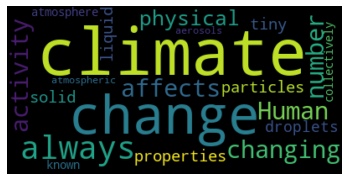

In [53]:
# here is a sample
text = "climate change. Climate is always changing. Human activity also affects climate through changes in the number and physical properties of tiny solid particles and liquid droplets in the atmosphere, known collectively as atmospheric aerosols"
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


plt.show()

As you can see word size is proportional to frequency of a word and highlight the main keywords in a text.
This gives an idea about the content of the  text.

We can do all the text pre processing or wrangling
 like 

- More Cleaning
- Case conversion
- Spell correction
- Expanding contractions
- Removing stop words
- Morphological normalization
    - Stemming
    - Lemmatization


But for this homework we'll only **do expanding contractions,  stop words removal,  and lemmatization**

# Q 9 (2 = .5+.5+.5+.5 points) Do
- expanding contractions
- stop words removal
- lemmatization
- Use wordcloud to visualize keywords

In [54]:
final_text_string = " ".join(climate_feed_df['final_tweet_text'].tolist())

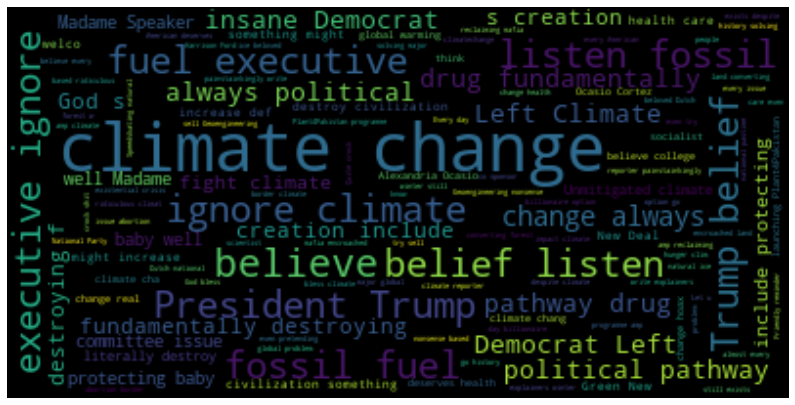

In [68]:
# write code here
import contractions    # there's a whole python library for word contractions

# TODO --> convert all words to lowercase example provided does NOT do this
# TODO --> strip puncuation marks (periods, exclamations, etc.)

# concatenate all rows of climate_feed_df['final_tweet_text'] for word cloud (and processing)
final_text_string = " ".join(climate_feed_df['final_tweet_text'].tolist())

test1 = "We'll overcome -- I'm only feeling tired right now, how're you doing?"
# test1 = contractions.fix(test1)
ec_final_text_string = contractions.fix(final_text_string)    # ec = expanded contractions
# print('\nec_final_text_string\n', ec_final_text_string)


# stop words removal
stopwords = nltk.corpus.stopwords.words('english')
# stop_clean_sent = [w for w in test1.split() if w not in stopwords]
stop_clean_sent = [w for w in ec_final_text_string.split() if w not in stopwords]
# print(stopwords)
# print('\nstop_clean_sent:\n', stop_clean_sent)   # uncomment for output

stop_clean_sent = list(map(lambda x: x.replace("destroying f", "destroying"), stop_clean_sent))
stop_clean_sent = list(map(lambda x: x.replace("God ' s", "God's"), stop_clean_sent))
stop_clean_sent = list(map(lambda x: x.replace("God s", "God's"), stop_clean_sent))
stop_clean_sent = list(map(lambda x: x.replace("shoul", "should"), stop_clean_sent))
stop_clean_sent = list(map(lambda x: x.replace("believe shoul", "believe should"), stop_clean_sent))
stop_clean_sent = list(map(lambda x: x.replace("s  creation", "creation"), stop_clean_sent))


# lemmatization - strips punctuation marks!
from textblob import TextBlob, Word

stop_clean_sent = " ".join(stop_clean_sent)
# print("\nstop_clean_sent:\n", stop_clean_sent)
s = TextBlob(stop_clean_sent)
lemmatized_sentence = " ".join([w.lemmatize() for w in s.words])
# print("\n\n\n\nlemmatized_sentence:\n", lemmatized_sentence)    # uncomment for output





# Wordcloud - word frequency determines font size for words displayed

# text = "climate change. Climate is always changing. Human activity also affects climate through changes in the number and physical properties of tiny solid particles and liquid droplets in the atmosphere, known collectively as atmospheric aerosols"
# wordcloud = WordCloud().generate(text)

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

figure(figsize=(14, 8))
wordcloud = WordCloud().generate(lemmatized_sentence)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


plt.show()


# I have include a sample ooutput. Your output can be different

# Homework ends
# Final thoughts
We did not do all of the cleanup or used all attributes for EDA. Let us highlight one more cleanup activity related to language.

In [57]:
# the following library would not install w/ Conda
# import enchant  # you can use textblog, enchant or any other dictionary

In [58]:
# dictionary = enchant.Dict('en')

In [59]:
# climate_feed_df['text'].loc[5217]

In [60]:
# [dictionary.check(w) for w in  nltk.word_tokenize(climate_feed_df['text'].loc[5217])]